___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Uncomment the following lines if you want to suppress warnings:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Set it to None to display all rows in the dataframe:
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited  
0       101348.880       1  
1       112542.580       0  
2       113931.570       1  
3        93826.630       0  
4        79084.100       0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe().T

count         mean       std          min          25%  \
RowNumber       10000.000     5000.500  2886.896        1.000     2500.750   
CustomerId      10000.000 15690940.569 71936.186 15565701.000 15628528.250   
CreditScore     10000.000      650.529    96.653      350.000      584.000   
Age             10000.000       38.922    10.488       18.000       32.000   
Tenure          10000.000        5.013     2.892        0.000        3.000   
Balance         10000.000    76485.889 62397.405        0.000        0.000   
NumOfProducts   10000.000        1.530     0.582        1.000        1.000   
HasCrCard       10000.000        0.706     0.456        0.000        0.000   
IsActiveMember  10000.000        0.515     0.500        0.000        0.000   
EstimatedSalary 10000.000   100090.240 57510.493       11.580    51002.110   
Exited          10000.000        0.204     0.403        0.000        0.000   

                         50%          75%          max  
RowNumber           5000.500     7500.250    10000.000  
CustomerId      15690738.000 15753233.750 15815690.000  
CreditScore          652.000      718.000      850.000  
Age                   37.000       44.000       92.000  
Tenure                 5.000        7.000       10.000  
Balance            97198.540   127644.240   250898.090  
NumOfProducts          1.000        2.000        4.000  
HasCrCard              1.000        1.000        1.000  
IsActiveMember         1.000        1.000        1.000  
EstimatedSalary   100193.915   149388.247   199992.480  
Exited                 0.000        0.000        1.000

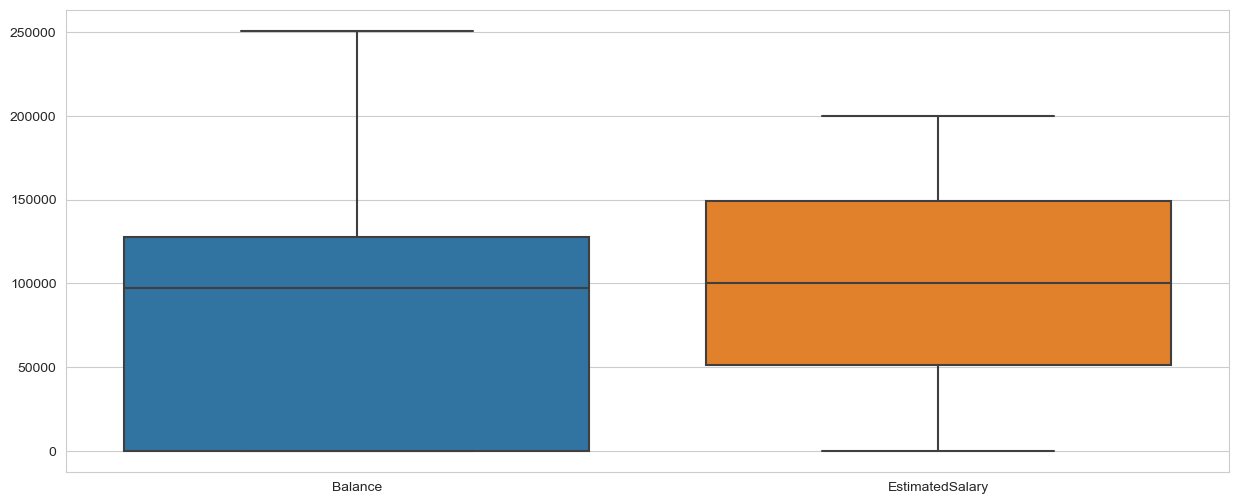

In [6]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[['Balance', 'EstimatedSalary']])
plt.show()

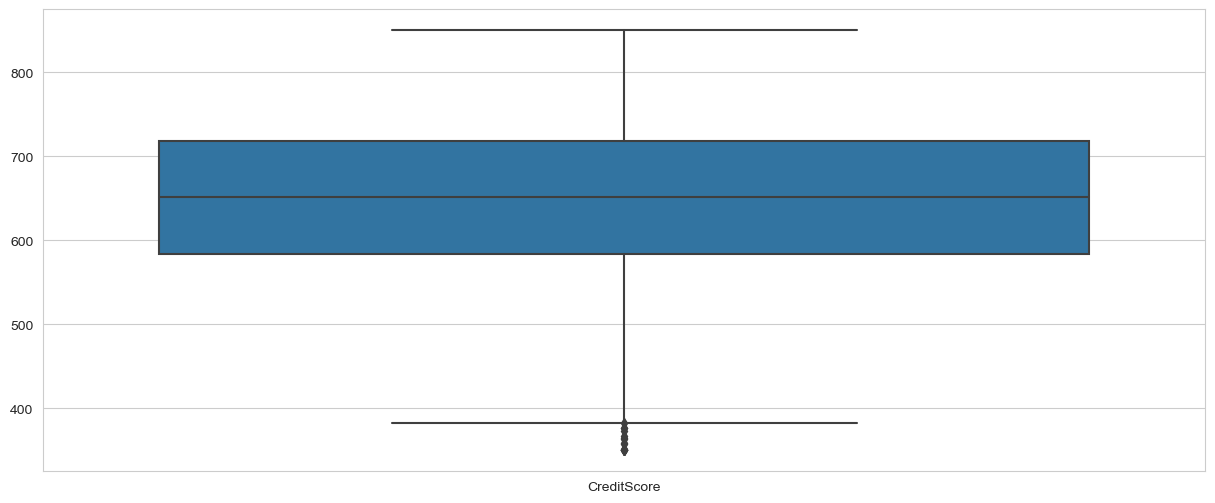

In [7]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[['CreditScore']])
plt.show()

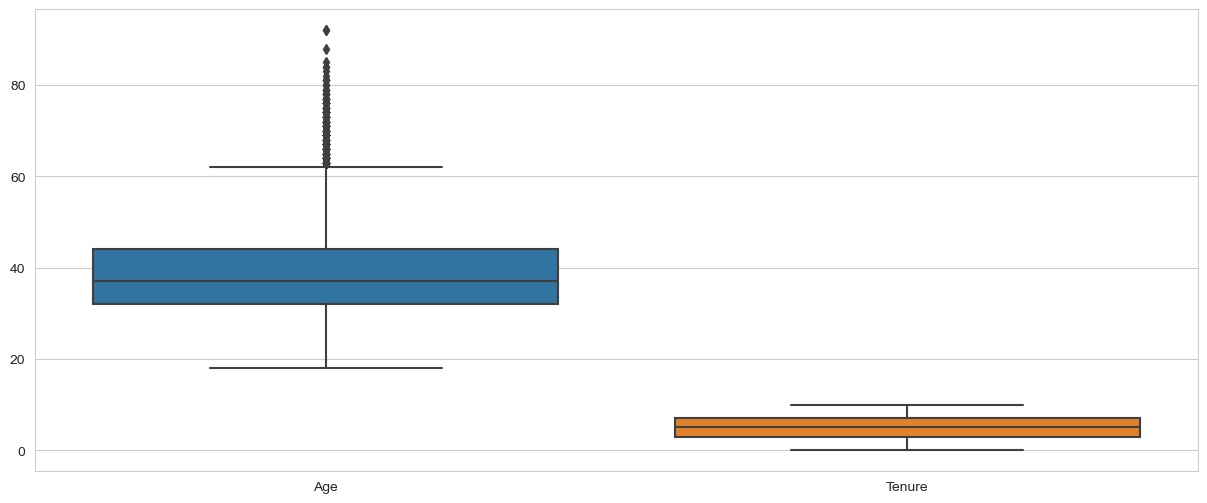

In [8]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[['Age', 'Tenure']])
plt.show()

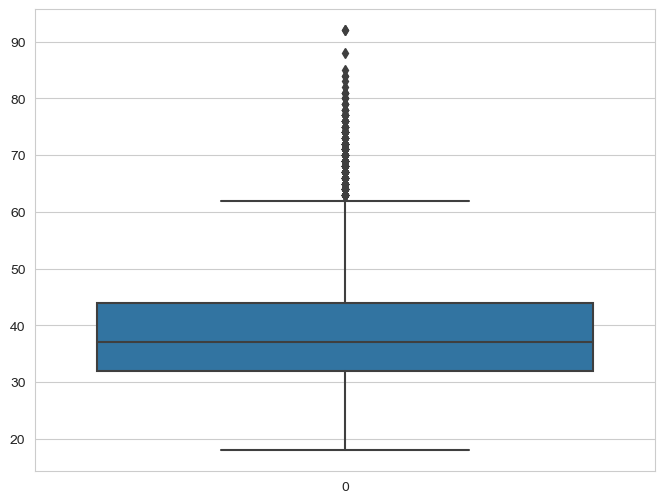

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['Age'])
plt.show()
# alot of outiers in Age column

In [10]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
# we do noot need these columns

In [11]:
# here i want to see if we have imbalanced data or not

target_variable = 'Exited'

# Calculate the class distribution
class_distribution = df[target_variable].value_counts()

# Calculate the percentage of each class
class_percentages = class_distribution / len(df) * 100

# Check if the data is imbalanced
is_imbalanced = class_percentages.min() < 30 # i set the percentage to 30%

# Print the class distribution and percentage
print("Class Distribution:")
print(class_distribution)
print("Class Percentages:")
print(class_percentages)

# Print whether the data is imbalanced
if is_imbalanced:
    print("The data is imbalanced.")
else:
    print("The data is balanced.")

# seems we have imbalanced data

Class Distribution:
Exited
0    7963
1    2037
Name: count, dtype: int64
Class Percentages:
Exited
0   79.630
1   20.370
Name: count, dtype: float64
The data is imbalanced.


In [12]:
unique_geographies = df["Geography"].unique()
print(unique_geographies)

['France' 'Spain' 'Germany']


In [13]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Map the "geography" column to numerical values
df["Geography"] = label_encoder.fit_transform(df["Geography"])


In [14]:
# here i want to see how the encoder worked on our data

# Get the unique encoded values
unique_encoded_values = df["Geography"].unique()

# Use inverse_transform to map the encoded values back to their original values
for encoded_value in unique_encoded_values:
    original_value = label_encoder.inverse_transform([encoded_value])
    print(f"Encoded {encoded_value} => Original {original_value[0]}")


Encoded 0 => Original France
Encoded 2 => Original Spain
Encoded 1 => Original Germany


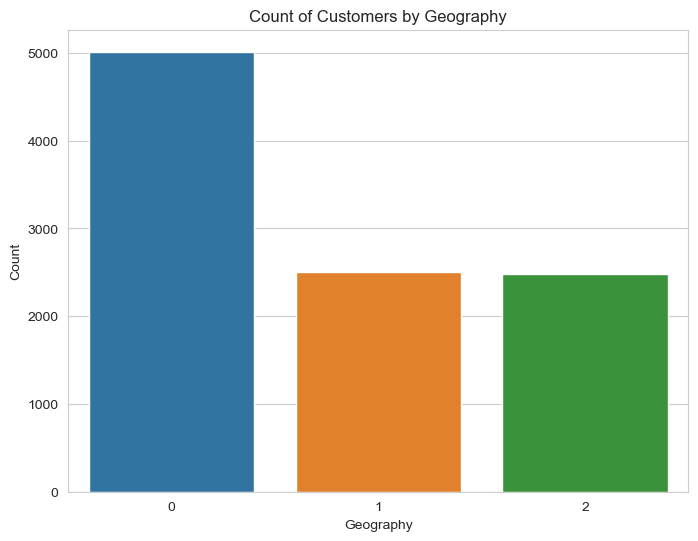

In [15]:
# visualizing the customers counteries 

plt.figure(figsize=(8, 6))
sns.countplot(x="Geography", data=df)
plt.title("Count of Customers by Geography")
plt.xlabel("Geography")
plt.ylabel("Count")
plt.show()
#     0: "France"
#     1: "Germany"
#     2: "Spain"

# the majority of the customers are from France

In [16]:
# Map the "Gender" column to numerical values

df["Gender"] = label_encoder.fit_transform(df["Gender"])

# Get the unique encoded values
unique_encoded_values = df["Gender"].unique()

# Use inverse_transform to map the encoded values back to their original values
for encoded_value in unique_encoded_values:
    original_value = label_encoder.inverse_transform([encoded_value])
    print(f"Encoded {encoded_value} => Original {original_value[0]}")

Encoded 0 => Original Female
Encoded 1 => Original Male


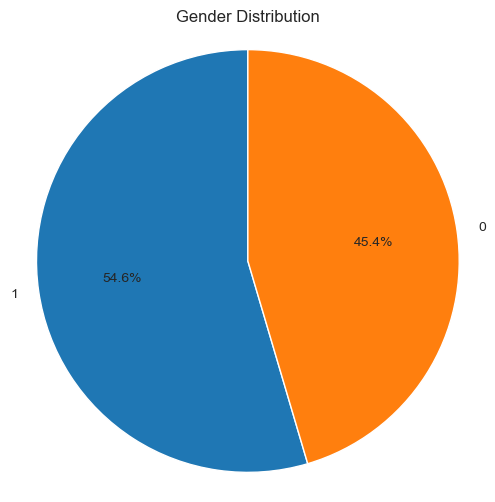

In [17]:
gender_counts = df["Gender"].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()

# not a big deffrince 

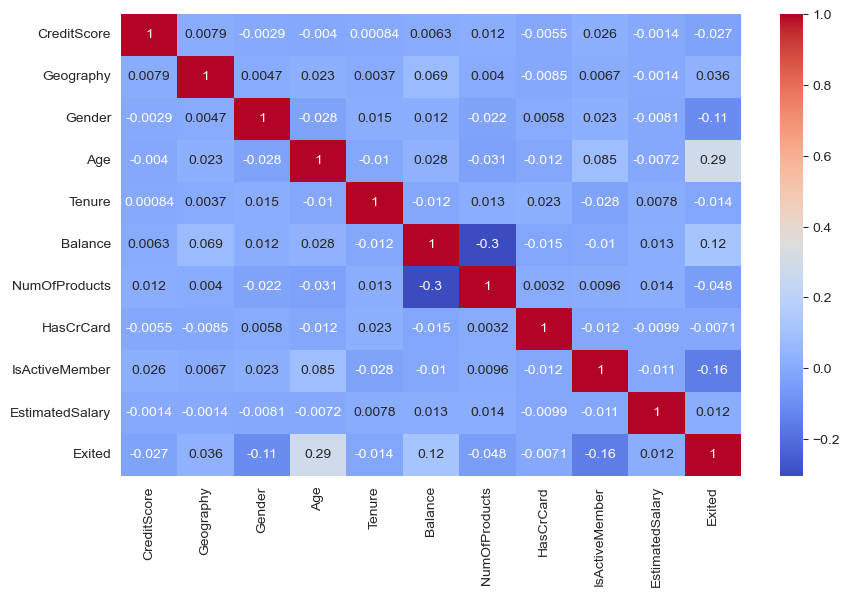

In [18]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

# seems we do not have multicolonirity

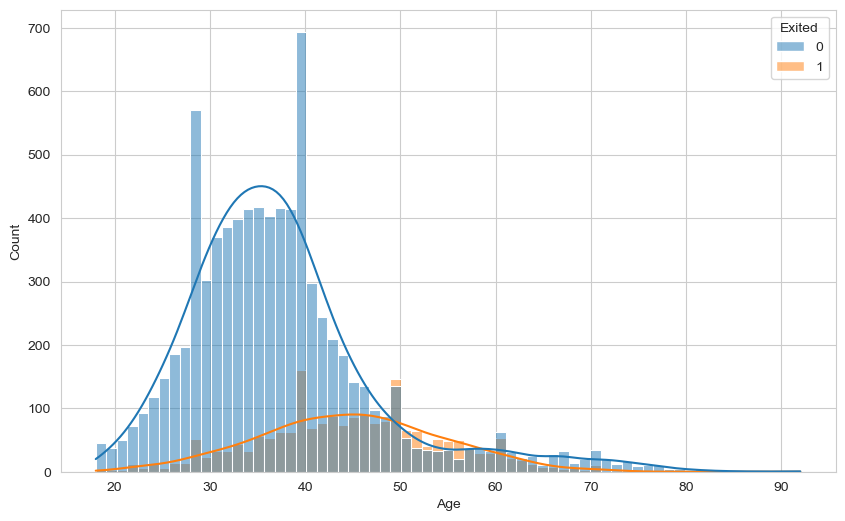

In [19]:
sns.histplot(data=df, x='Age', hue='Exited', kde=True)
plt.show()
# Age 40 and 50 have the most exited counts

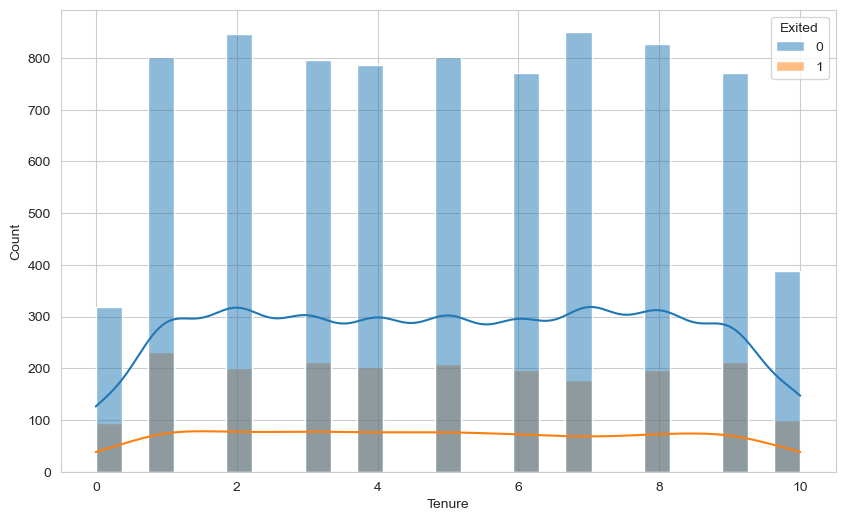

In [20]:
sns.histplot(data=df, x='Tenure', hue='Exited', kde=True)
plt.show()

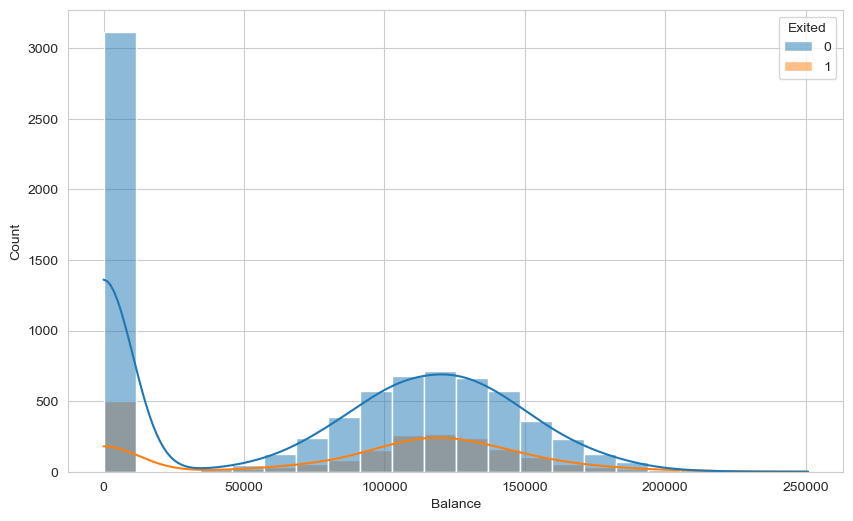

In [21]:
sns.histplot(data=df, x='Balance', hue='Exited', kde=True)
plt.show()
# people with low balance are the most exited count

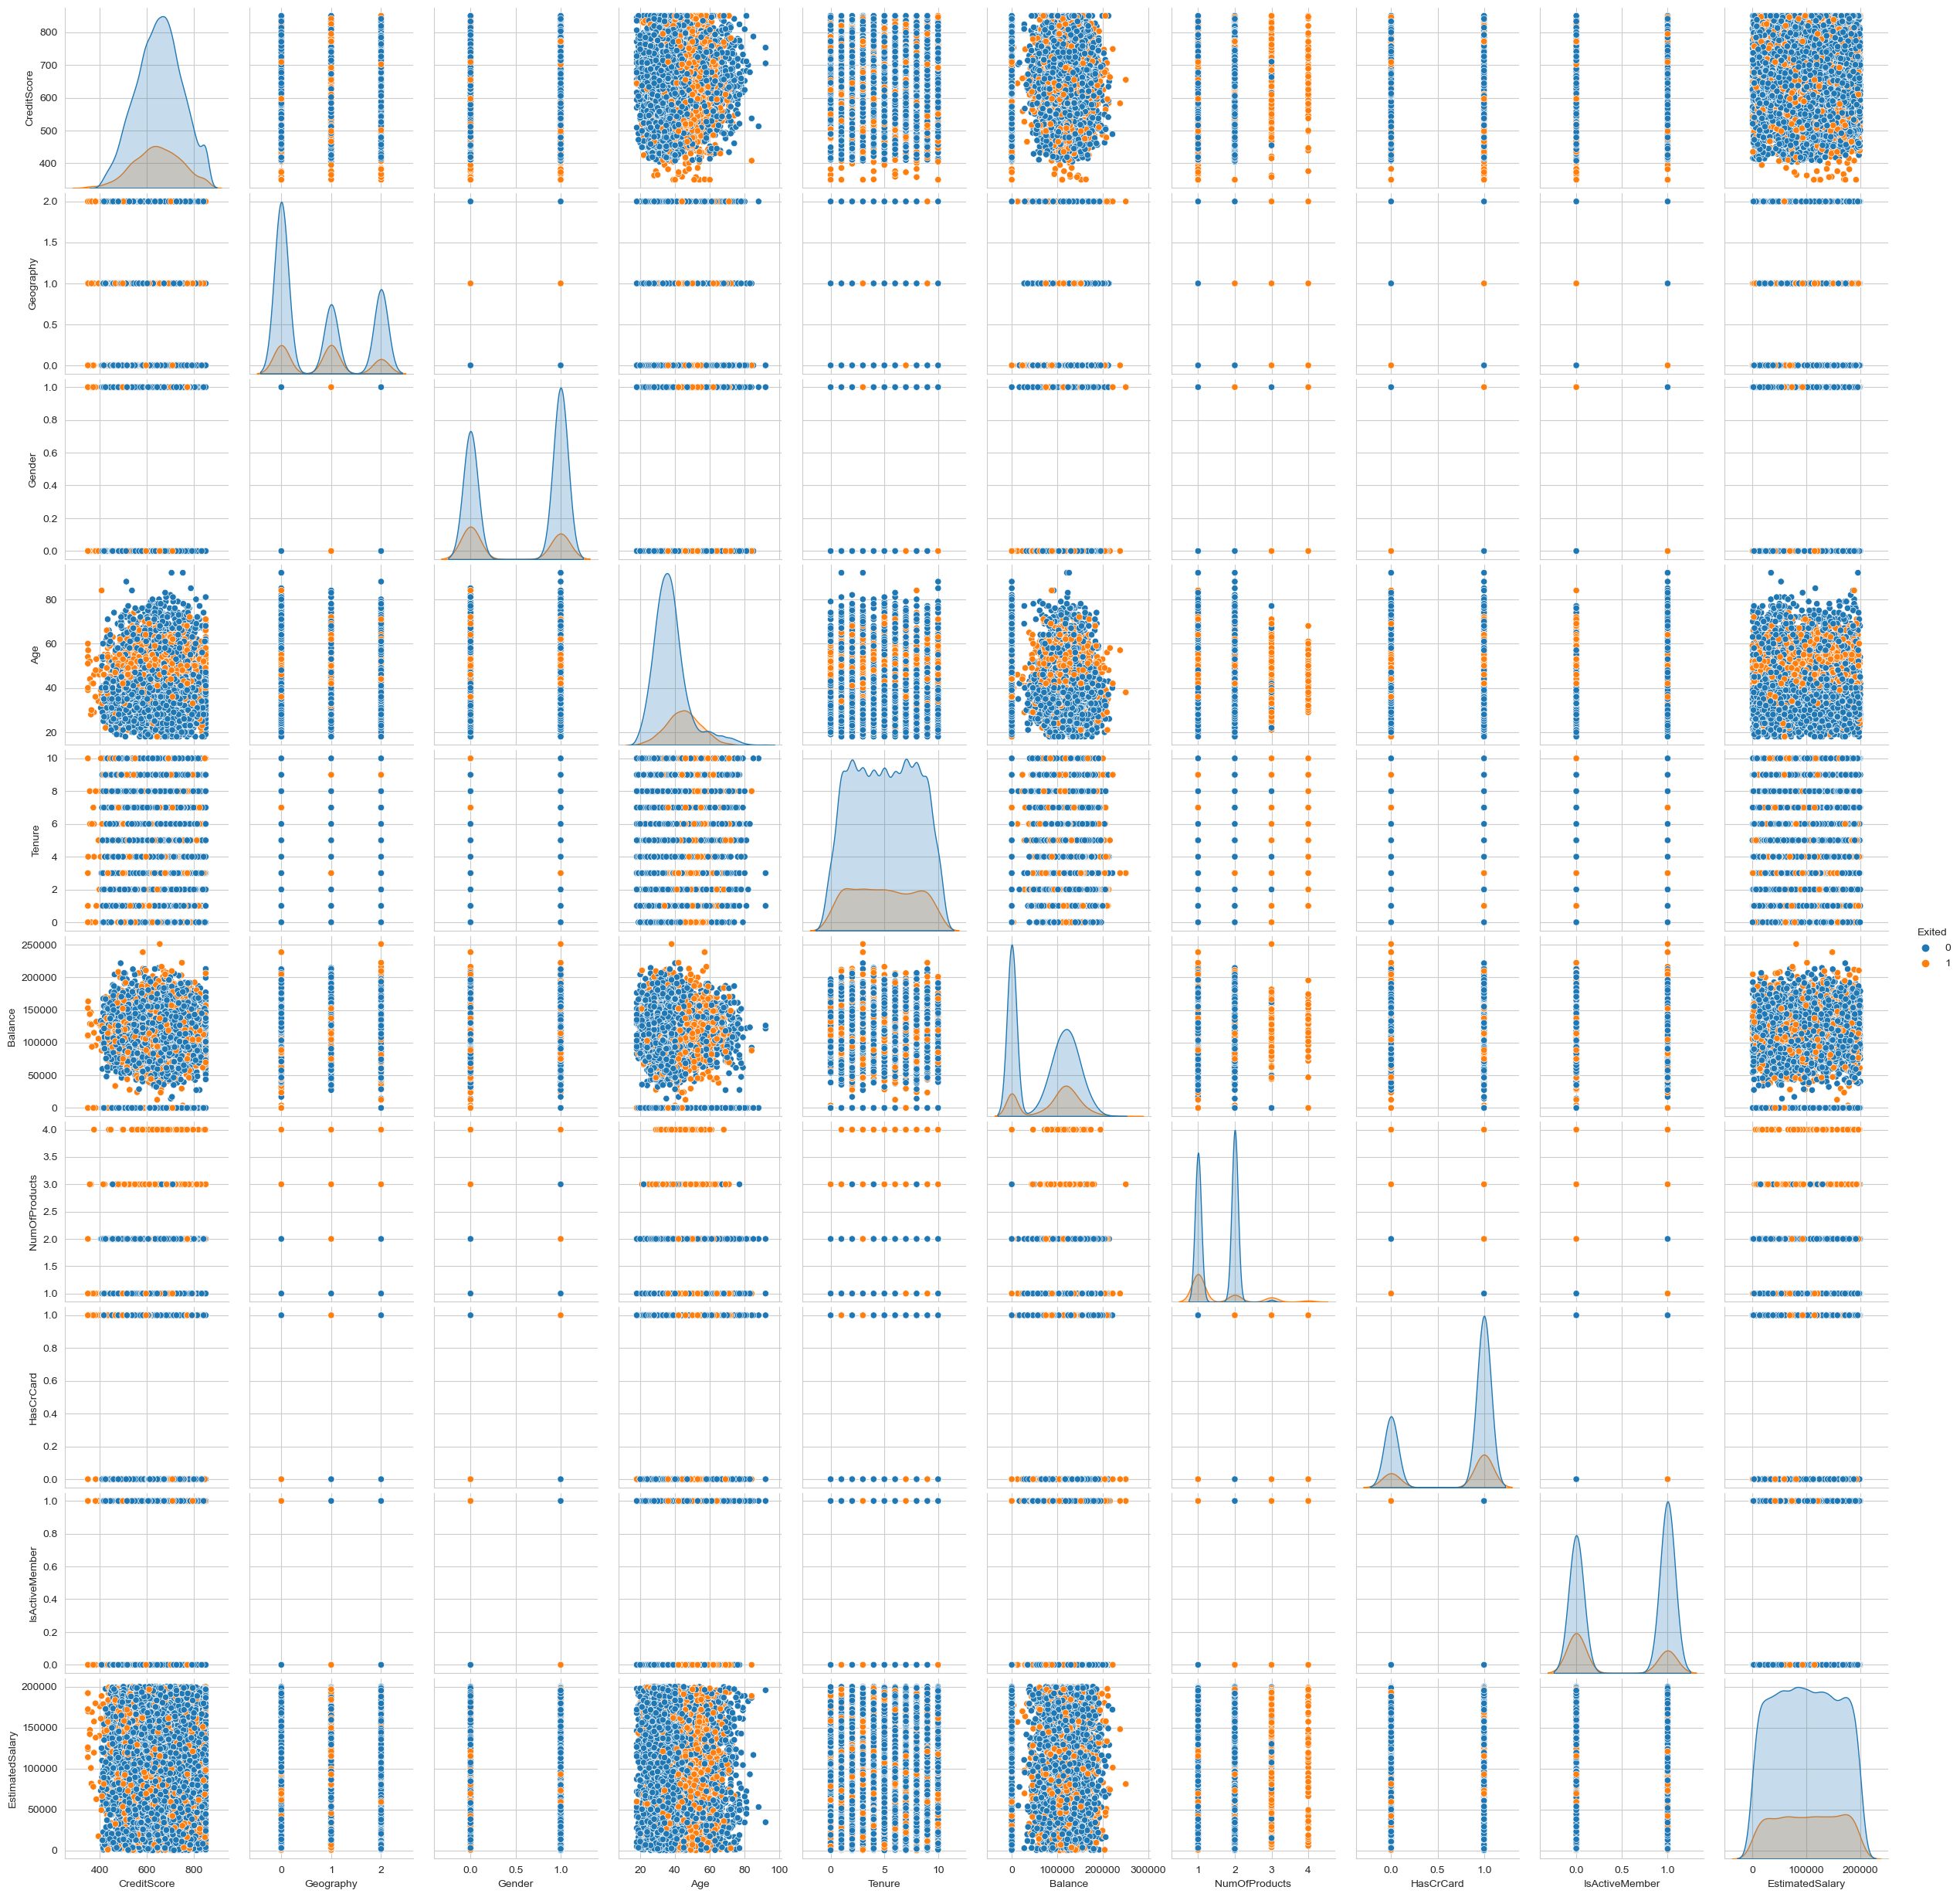

In [22]:
sns.pairplot(df, hue='Exited', diag_kind='kde')
plt.show()

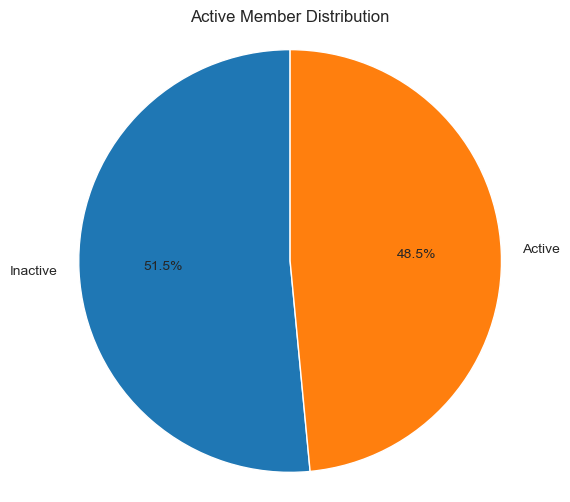

In [23]:
# Create a pie chart

active_member_counts = df["IsActiveMember"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(active_member_counts, labels=["Inactive", "Active"], autopct='%1.1f%%', startangle=90)
plt.title("Active Member Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()

# more inactive customers 

<Figure size 1000x600 with 0 Axes>

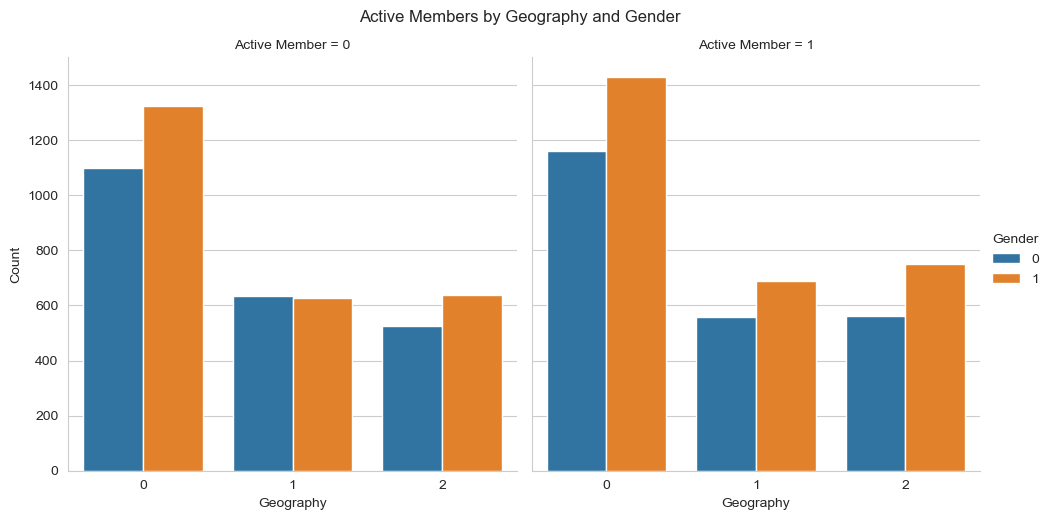

In [24]:
# Create a catplot to visualize the count of IsActiveMember by Geography and Gender
plt.figure(figsize=(10, 6))
g = sns.catplot(data=df, x="Geography", hue="Gender", col="IsActiveMember", kind="count")
g.set_axis_labels("Geography", "Count")
g.set_titles("Active Member = {col_name}")
g.fig.suptitle("Active Members by Geography and Gender", y=1.03)

plt.show()

In [25]:
df.sample(10)

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
3881          588          0       0   64       3      0.000              1   
4044          658          0       1   32       8      0.000              1   
8138          584          1       0   36       4 109646.830              1   
7814          647          1       0   33       3 168560.460              2   
4313          646          2       1   69      10 115462.440              1   
5905          511          0       0   30       5      0.000              2   
8914          429          0       0   39       6  48023.830              1   
3521          627          2       1   49       4 111087.500              1   
7365          568          2       0   36      10 153610.610              1   
8789          493          0       0   36       2      0.000              2   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
3881          1               1       189703.650       0  
4044          1               1        80410.680       0  
8138          1               1        70240.790       0  
7814          0               0        90270.160       0  
4313          1               0        40421.870       0  
5905          1               0       143994.860       0  
8914          1               0        74870.990       0  
3521          0               1       146680.250       0  
7365          1               1        54083.800       1  
8789          0               1        99770.300       0

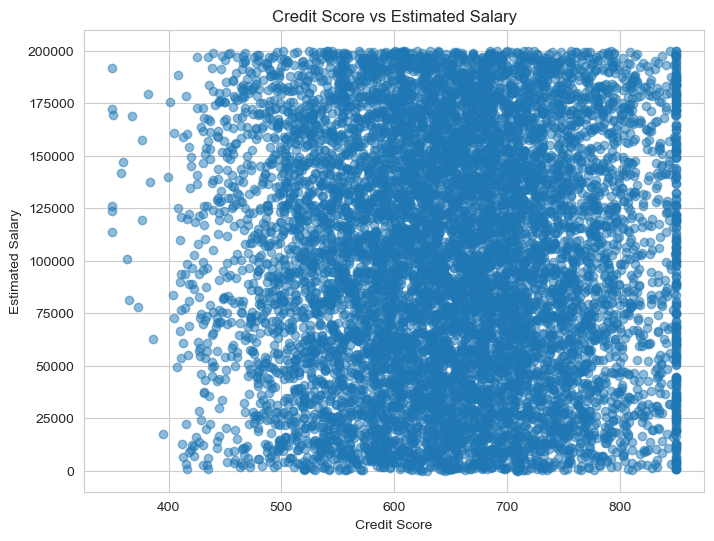

In [26]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df["CreditScore"], df["EstimatedSalary"], alpha=0.5)
plt.title("Credit Score vs Estimated Salary")
plt.xlabel("Credit Score")
plt.ylabel("Estimated Salary")

plt.show()

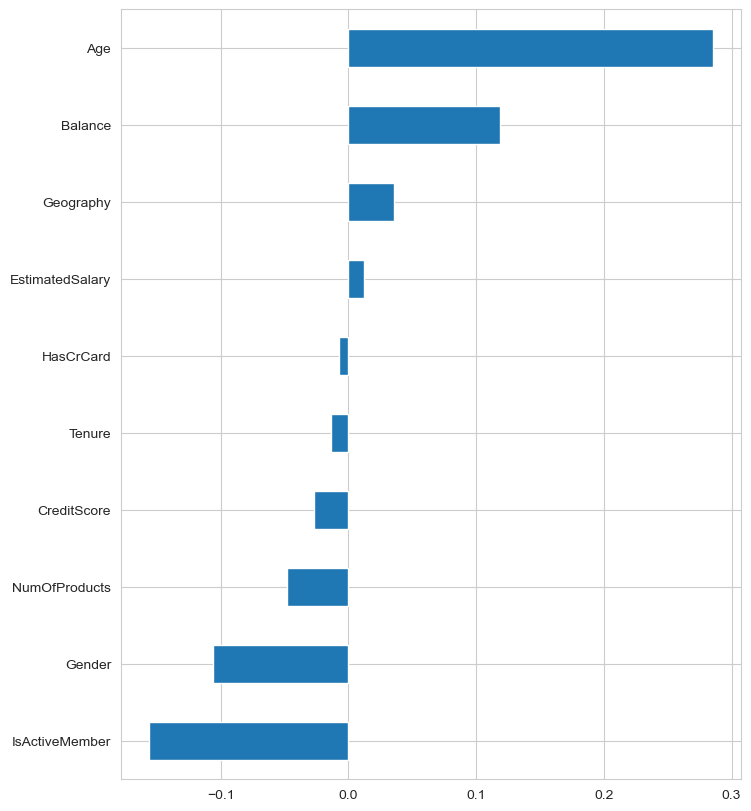

In [84]:
plt.figure(figsize=(8, 10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind="barh")
plt.show()

# Preprocessing of Data
- Train | Test Split, Scalling

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df.drop("Exited", axis=1)  # Features (all columns except 'Exited')
y = df["Exited"]  # Target variable

In [29]:
seed=101

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed, stratify=y)

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [32]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [34]:
# Create the model
model = Sequential()

# Add layers to the model
model.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# 4 layers each one with different num of neurons except the output layer cuz we are dealing with a binary classification problem

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1265 (4.94 KB)
Trainable params: 1265 (4.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
history = model.fit(x=X_train, y=y_train, validation_split=0.15, batch_size=64, epochs=1000)

Epoch 1/1000
120/120 [==============================] - 1s 4ms/step - loss: 0.5548 - accuracy: 0.7527 - val_loss: 0.4850 - val_accuracy: 0.7926
Epoch 2/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7973 - val_loss: 0.4594 - val_accuracy: 0.7956
Epoch 3/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.4487 - accuracy: 0.8076 - val_loss: 0.4424 - val_accuracy: 0.8089
Epoch 4/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.8148 - val_loss: 0.4301 - val_accuracy: 0.8170
Epoch 5/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.8187 - val_loss: 0.4197 - val_accuracy: 0.8178
Epoch 6/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8258 - val_loss: 0.4018 - val_accuracy: 0.8274
Epoch 7/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3981 - accuracy: 0.8319 - val_loss: 0.3839 - val_accuracy:

120/120 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.8638 - val_loss: 0.3320 - val_accuracy: 0.8652
Epoch 58/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.8648 - val_loss: 0.3328 - val_accuracy: 0.8674
Epoch 59/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3294 - accuracy: 0.8647 - val_loss: 0.3314 - val_accuracy: 0.8644
Epoch 60/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3298 - accuracy: 0.8646 - val_loss: 0.3347 - val_accuracy: 0.8630
Epoch 61/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.8660 - val_loss: 0.3321 - val_accuracy: 0.8652
Epoch 62/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3275 - accuracy: 0.8651 - val_loss: 0.3300 - val_accuracy: 0.8681
Epoch 63/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8677 - val_loss: 0.3314 - val_accuracy: 0.8659

120/120 [==============================] - 0s 2ms/step - loss: 0.3137 - accuracy: 0.8723 - val_loss: 0.3315 - val_accuracy: 0.8622
Epoch 114/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8728 - val_loss: 0.3324 - val_accuracy: 0.8630
Epoch 115/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8714 - val_loss: 0.3324 - val_accuracy: 0.8704
Epoch 116/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3139 - accuracy: 0.8708 - val_loss: 0.3340 - val_accuracy: 0.8652
Epoch 117/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.8718 - val_loss: 0.3407 - val_accuracy: 0.8615
Epoch 118/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3139 - accuracy: 0.8740 - val_loss: 0.3304 - val_accuracy: 0.8719
Epoch 119/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8703 - val_loss: 0.3306 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.3063 - accuracy: 0.8740 - val_loss: 0.3450 - val_accuracy: 0.8496
Epoch 170/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3040 - accuracy: 0.8761 - val_loss: 0.3428 - val_accuracy: 0.8667
Epoch 171/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3062 - accuracy: 0.8735 - val_loss: 0.3500 - val_accuracy: 0.8526
Epoch 172/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3027 - accuracy: 0.8759 - val_loss: 0.3370 - val_accuracy: 0.8659
Epoch 173/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3044 - accuracy: 0.8770 - val_loss: 0.3355 - val_accuracy: 0.8644
Epoch 174/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3056 - accuracy: 0.8757 - val_loss: 0.3325 - val_accuracy: 0.8659
Epoch 175/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3033 - accuracy: 0.8759 - val_loss: 0.3348 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.2960 - accuracy: 0.8782 - val_loss: 0.3406 - val_accuracy: 0.8652
Epoch 226/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2963 - accuracy: 0.8795 - val_loss: 0.3390 - val_accuracy: 0.8637
Epoch 227/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2971 - accuracy: 0.8775 - val_loss: 0.3381 - val_accuracy: 0.8681
Epoch 228/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2962 - accuracy: 0.8784 - val_loss: 0.3437 - val_accuracy: 0.8652
Epoch 229/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2968 - accuracy: 0.8797 - val_loss: 0.3412 - val_accuracy: 0.8659
Epoch 230/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2967 - accuracy: 0.8786 - val_loss: 0.3415 - val_accuracy: 0.8659
Epoch 231/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2975 - accuracy: 0.8769 - val_loss: 0.3404 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.2904 - accuracy: 0.8792 - val_loss: 0.3437 - val_accuracy: 0.8637
Epoch 282/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2906 - accuracy: 0.8834 - val_loss: 0.3469 - val_accuracy: 0.8615
Epoch 283/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2911 - accuracy: 0.8810 - val_loss: 0.3411 - val_accuracy: 0.8644
Epoch 284/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2932 - accuracy: 0.8783 - val_loss: 0.3448 - val_accuracy: 0.8659
Epoch 285/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2910 - accuracy: 0.8814 - val_loss: 0.3524 - val_accuracy: 0.8637
Epoch 286/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2919 - accuracy: 0.8786 - val_loss: 0.3450 - val_accuracy: 0.8674
Epoch 287/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2920 - accuracy: 0.8804 - val_loss: 0.3477 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.2891 - accuracy: 0.8793 - val_loss: 0.3663 - val_accuracy: 0.8511
Epoch 338/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2875 - accuracy: 0.8822 - val_loss: 0.3515 - val_accuracy: 0.8615
Epoch 339/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2869 - accuracy: 0.8822 - val_loss: 0.3519 - val_accuracy: 0.8659
Epoch 340/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2863 - accuracy: 0.8829 - val_loss: 0.3465 - val_accuracy: 0.8652
Epoch 341/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2873 - accuracy: 0.8790 - val_loss: 0.3471 - val_accuracy: 0.8689
Epoch 342/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2875 - accuracy: 0.8803 - val_loss: 0.3485 - val_accuracy: 0.8659
Epoch 343/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2858 - accuracy: 0.8835 - val_loss: 0.3516 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.2841 - accuracy: 0.8821 - val_loss: 0.3546 - val_accuracy: 0.8667
Epoch 394/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2838 - accuracy: 0.8863 - val_loss: 0.3682 - val_accuracy: 0.8563
Epoch 395/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2817 - accuracy: 0.8852 - val_loss: 0.3556 - val_accuracy: 0.8637
Epoch 396/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2827 - accuracy: 0.8844 - val_loss: 0.3653 - val_accuracy: 0.8578
Epoch 397/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2823 - accuracy: 0.8850 - val_loss: 0.3560 - val_accuracy: 0.8637
Epoch 398/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2826 - accuracy: 0.8842 - val_loss: 0.3531 - val_accuracy: 0.8681
Epoch 399/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2825 - accuracy: 0.8820 - val_loss: 0.3548 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.2794 - accuracy: 0.8869 - val_loss: 0.3718 - val_accuracy: 0.8593
Epoch 450/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2769 - accuracy: 0.8872 - val_loss: 0.3635 - val_accuracy: 0.8681
Epoch 451/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2765 - accuracy: 0.8858 - val_loss: 0.3594 - val_accuracy: 0.8674
Epoch 452/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2756 - accuracy: 0.8854 - val_loss: 0.3718 - val_accuracy: 0.8548
Epoch 453/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2766 - accuracy: 0.8878 - val_loss: 0.3604 - val_accuracy: 0.8637
Epoch 454/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2790 - accuracy: 0.8867 - val_loss: 0.3606 - val_accuracy: 0.8711
Epoch 455/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2791 - accuracy: 0.8839 - val_loss: 0.3625 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.2730 - accuracy: 0.8903 - val_loss: 0.3636 - val_accuracy: 0.8659
Epoch 506/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2708 - accuracy: 0.8908 - val_loss: 0.3607 - val_accuracy: 0.8659
Epoch 507/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2698 - accuracy: 0.8878 - val_loss: 0.3681 - val_accuracy: 0.8644
Epoch 508/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2735 - accuracy: 0.8856 - val_loss: 0.3717 - val_accuracy: 0.8622
Epoch 509/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2726 - accuracy: 0.8865 - val_loss: 0.3623 - val_accuracy: 0.8696
Epoch 510/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2731 - accuracy: 0.8869 - val_loss: 0.3749 - val_accuracy: 0.8511
Epoch 511/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2736 - accuracy: 0.8863 - val_loss: 0.3667 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.2686 - accuracy: 0.8898 - val_loss: 0.3670 - val_accuracy: 0.8726
Epoch 562/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2688 - accuracy: 0.8897 - val_loss: 0.3706 - val_accuracy: 0.8659
Epoch 563/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2702 - accuracy: 0.8919 - val_loss: 0.3666 - val_accuracy: 0.8704
Epoch 564/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2682 - accuracy: 0.8899 - val_loss: 0.3680 - val_accuracy: 0.8667
Epoch 565/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2688 - accuracy: 0.8905 - val_loss: 0.3679 - val_accuracy: 0.8704
Epoch 566/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2692 - accuracy: 0.8892 - val_loss: 0.3797 - val_accuracy: 0.8585
Epoch 567/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2716 - accuracy: 0.8869 - val_loss: 0.3749 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.2659 - accuracy: 0.8899 - val_loss: 0.3835 - val_accuracy: 0.8704
Epoch 618/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2636 - accuracy: 0.8924 - val_loss: 0.3824 - val_accuracy: 0.8644
Epoch 619/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2642 - accuracy: 0.8910 - val_loss: 0.3780 - val_accuracy: 0.8637
Epoch 620/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2658 - accuracy: 0.8924 - val_loss: 0.3790 - val_accuracy: 0.8615
Epoch 621/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2662 - accuracy: 0.8906 - val_loss: 0.3759 - val_accuracy: 0.8659
Epoch 622/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2643 - accuracy: 0.8924 - val_loss: 0.3767 - val_accuracy: 0.8667
Epoch 623/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2624 - accuracy: 0.8912 - val_loss: 0.3855 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.2625 - accuracy: 0.8929 - val_loss: 0.3845 - val_accuracy: 0.8585
Epoch 674/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2636 - accuracy: 0.8923 - val_loss: 0.3903 - val_accuracy: 0.8570
Epoch 675/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2620 - accuracy: 0.8920 - val_loss: 0.3838 - val_accuracy: 0.8630
Epoch 676/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2625 - accuracy: 0.8924 - val_loss: 0.3831 - val_accuracy: 0.8704
Epoch 677/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2631 - accuracy: 0.8920 - val_loss: 0.3790 - val_accuracy: 0.8674
Epoch 678/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2620 - accuracy: 0.8920 - val_loss: 0.3907 - val_accuracy: 0.8704
Epoch 679/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2658 - accuracy: 0.8920 - val_loss: 0.3911 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.2600 - accuracy: 0.8941 - val_loss: 0.4116 - val_accuracy: 0.8556
Epoch 730/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2571 - accuracy: 0.8944 - val_loss: 0.3966 - val_accuracy: 0.8674
Epoch 731/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2580 - accuracy: 0.8962 - val_loss: 0.3848 - val_accuracy: 0.8556
Epoch 732/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2579 - accuracy: 0.8942 - val_loss: 0.3888 - val_accuracy: 0.8659
Epoch 733/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2585 - accuracy: 0.8963 - val_loss: 0.4040 - val_accuracy: 0.8593
Epoch 734/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2608 - accuracy: 0.8912 - val_loss: 0.3990 - val_accuracy: 0.8585
Epoch 735/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2565 - accuracy: 0.8946 - val_loss: 0.4145 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.2554 - accuracy: 0.8975 - val_loss: 0.3997 - val_accuracy: 0.8637
Epoch 786/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2569 - accuracy: 0.8946 - val_loss: 0.4011 - val_accuracy: 0.8644
Epoch 787/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2572 - accuracy: 0.8970 - val_loss: 0.4035 - val_accuracy: 0.8704
Epoch 788/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2533 - accuracy: 0.8980 - val_loss: 0.4000 - val_accuracy: 0.8607
Epoch 789/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2545 - accuracy: 0.8969 - val_loss: 0.3993 - val_accuracy: 0.8578
Epoch 790/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2540 - accuracy: 0.8963 - val_loss: 0.4051 - val_accuracy: 0.8630
Epoch 791/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2545 - accuracy: 0.8941 - val_loss: 0.4221 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.2516 - accuracy: 0.8982 - val_loss: 0.4015 - val_accuracy: 0.8593
Epoch 842/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2531 - accuracy: 0.8973 - val_loss: 0.4024 - val_accuracy: 0.8607
Epoch 843/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2508 - accuracy: 0.8965 - val_loss: 0.4055 - val_accuracy: 0.8637
Epoch 844/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2516 - accuracy: 0.8975 - val_loss: 0.4129 - val_accuracy: 0.8607
Epoch 845/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2504 - accuracy: 0.8970 - val_loss: 0.4071 - val_accuracy: 0.8607
Epoch 846/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2519 - accuracy: 0.8973 - val_loss: 0.4121 - val_accuracy: 0.8630
Epoch 847/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2522 - accuracy: 0.8963 - val_loss: 0.4031 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.2506 - accuracy: 0.8961 - val_loss: 0.4174 - val_accuracy: 0.8511
Epoch 898/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2529 - accuracy: 0.8950 - val_loss: 0.4205 - val_accuracy: 0.8556
Epoch 899/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2538 - accuracy: 0.8953 - val_loss: 0.4089 - val_accuracy: 0.8511
Epoch 900/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.8991 - val_loss: 0.4035 - val_accuracy: 0.8615
Epoch 901/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2478 - accuracy: 0.8980 - val_loss: 0.4232 - val_accuracy: 0.8459
Epoch 902/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2481 - accuracy: 0.8988 - val_loss: 0.4185 - val_accuracy: 0.8637
Epoch 903/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.8992 - val_loss: 0.4273 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.8974 - val_loss: 0.4353 - val_accuracy: 0.8444
Epoch 954/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.8973 - val_loss: 0.4142 - val_accuracy: 0.8637
Epoch 955/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2443 - accuracy: 0.9007 - val_loss: 0.4266 - val_accuracy: 0.8600
Epoch 956/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2474 - accuracy: 0.8978 - val_loss: 0.4155 - val_accuracy: 0.8593
Epoch 957/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2453 - accuracy: 0.8997 - val_loss: 0.4178 - val_accuracy: 0.8600
Epoch 958/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.8997 - val_loss: 0.4189 - val_accuracy: 0.8578
Epoch 959/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.8984 - val_loss: 0.4282 - val_accuracy: 

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
# Predict using the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Generate classification report
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_report_str}')

32/32 [==============================] - 0s 1ms/step
Accuracy: 0.819
Confusion Matrix:
[[740  56]
 [125  79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       796
           1       0.59      0.39      0.47       204

    accuracy                           0.82      1000
   macro avg       0.72      0.66      0.68      1000
weighted avg       0.80      0.82      0.80      1000



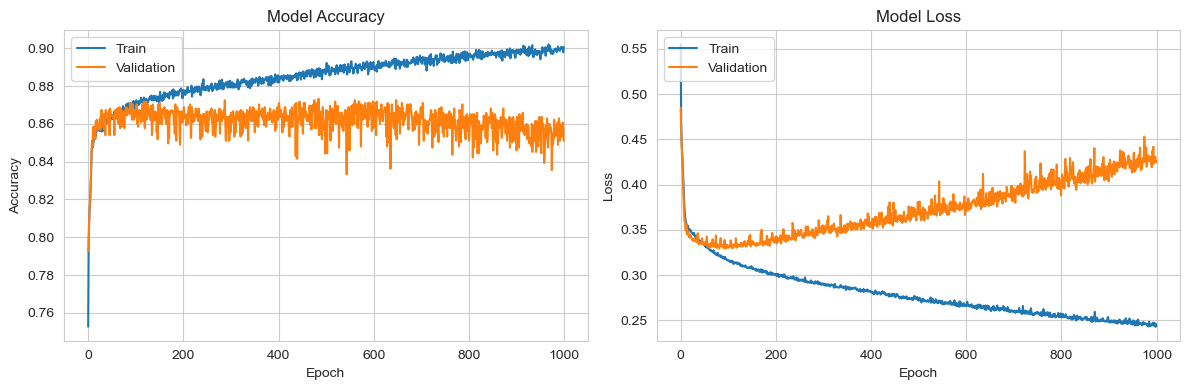

In [38]:
# Plot training history for the model
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [45]:
from sklearn.metrics import roc_curve, auc

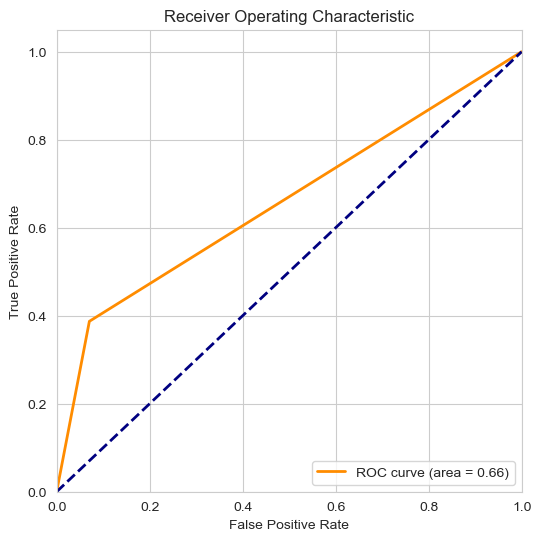

In [39]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [36]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)

In [41]:
# Create the model
model_with_weights = Sequential()

# Add layers to the model
model_with_weights.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model_with_weights.add(Dense(32, activation="relu"))
model_with_weights.add(Dense(16, activation="relu"))
model_with_weights.add(Dense(1, activation="sigmoid"))



# Compile the model without specifying class weights in compile
model_with_weights.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
model_with_weights.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                176       
                                                                 
 dense_5 (Dense)             (None, 32)                544       
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1265 (4.94 KB)
Trainable params: 1265 (4.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
history1 = model_with_weights.fit(X_train, y_train, epochs=1000, validation_split=0.15, 
                                  batch_size=64, class_weight={0: class_weights[0], 1: class_weights[1]})

Epoch 1/1000
120/120 [==============================] - 0s 4ms/step - loss: 0.3420 - accuracy: 0.8437 - val_loss: 0.4161 - val_accuracy: 0.8111
Epoch 2/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3410 - accuracy: 0.8405 - val_loss: 0.3369 - val_accuracy: 0.8541
Epoch 3/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3398 - accuracy: 0.8424 - val_loss: 0.3794 - val_accuracy: 0.8333
Epoch 4/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3433 - accuracy: 0.8384 - val_loss: 0.3388 - val_accuracy: 0.8519
Epoch 5/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3365 - accuracy: 0.8447 - val_loss: 0.3979 - val_accuracy: 0.8119
Epoch 6/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3401 - accuracy: 0.8401 - val_loss: 0.4477 - val_accuracy: 0.8052
Epoch 7/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3399 - accuracy: 0.8408 - val_loss: 0.3360 - val_accuracy:

120/120 [==============================] - 0s 3ms/step - loss: 0.3388 - accuracy: 0.8422 - val_loss: 0.4062 - val_accuracy: 0.8237
Epoch 58/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3349 - accuracy: 0.8422 - val_loss: 0.3819 - val_accuracy: 0.8289
Epoch 59/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8426 - val_loss: 0.3700 - val_accuracy: 0.8385
Epoch 60/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3331 - accuracy: 0.8410 - val_loss: 0.4070 - val_accuracy: 0.8193
Epoch 61/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3330 - accuracy: 0.8438 - val_loss: 0.4446 - val_accuracy: 0.8074
Epoch 62/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3391 - accuracy: 0.8439 - val_loss: 0.4287 - val_accuracy: 0.8126
Epoch 63/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3318 - accuracy: 0.8431 - val_loss: 0.4516 - val_accuracy: 0.7919

120/120 [==============================] - 0s 3ms/step - loss: 0.3308 - accuracy: 0.8468 - val_loss: 0.4449 - val_accuracy: 0.8104
Epoch 114/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3284 - accuracy: 0.8452 - val_loss: 0.3971 - val_accuracy: 0.8267
Epoch 115/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3332 - accuracy: 0.8434 - val_loss: 0.4643 - val_accuracy: 0.7919
Epoch 116/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3314 - accuracy: 0.8459 - val_loss: 0.4537 - val_accuracy: 0.7970
Epoch 117/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.8456 - val_loss: 0.4540 - val_accuracy: 0.8000
Epoch 118/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8450 - val_loss: 0.4420 - val_accuracy: 0.8081
Epoch 119/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3365 - accuracy: 0.8431 - val_loss: 0.4203 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.3283 - accuracy: 0.8467 - val_loss: 0.4456 - val_accuracy: 0.8096
Epoch 170/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3253 - accuracy: 0.8431 - val_loss: 0.3992 - val_accuracy: 0.8333
Epoch 171/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3311 - accuracy: 0.8430 - val_loss: 0.3992 - val_accuracy: 0.8311
Epoch 172/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3274 - accuracy: 0.8460 - val_loss: 0.4741 - val_accuracy: 0.8015
Epoch 173/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8467 - val_loss: 0.4339 - val_accuracy: 0.8007
Epoch 174/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3278 - accuracy: 0.8464 - val_loss: 0.4572 - val_accuracy: 0.8022
Epoch 175/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3287 - accuracy: 0.8465 - val_loss: 0.5328 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.3268 - accuracy: 0.8482 - val_loss: 0.4367 - val_accuracy: 0.8170
Epoch 226/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3291 - accuracy: 0.8486 - val_loss: 0.4032 - val_accuracy: 0.8363
Epoch 227/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3289 - accuracy: 0.8444 - val_loss: 0.4414 - val_accuracy: 0.8200
Epoch 228/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3232 - accuracy: 0.8480 - val_loss: 0.4623 - val_accuracy: 0.7933
Epoch 229/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8492 - val_loss: 0.4826 - val_accuracy: 0.8000
Epoch 230/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.8499 - val_loss: 0.4794 - val_accuracy: 0.7978
Epoch 231/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3251 - accuracy: 0.8463 - val_loss: 0.4724 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.3261 - accuracy: 0.8448 - val_loss: 0.4571 - val_accuracy: 0.8111
Epoch 282/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3241 - accuracy: 0.8503 - val_loss: 0.4662 - val_accuracy: 0.7985
Epoch 283/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3212 - accuracy: 0.8507 - val_loss: 0.5166 - val_accuracy: 0.7889
Epoch 284/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.8451 - val_loss: 0.4947 - val_accuracy: 0.7926
Epoch 285/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.8508 - val_loss: 0.4513 - val_accuracy: 0.8148
Epoch 286/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3221 - accuracy: 0.8472 - val_loss: 0.5099 - val_accuracy: 0.7822
Epoch 287/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.8516 - val_loss: 0.5027 - val_accuracy: 

120/120 [==============================] - 0s 4ms/step - loss: 0.3179 - accuracy: 0.8510 - val_loss: 0.5223 - val_accuracy: 0.7844
Epoch 338/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3178 - accuracy: 0.8511 - val_loss: 0.4792 - val_accuracy: 0.8030
Epoch 339/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3168 - accuracy: 0.8512 - val_loss: 0.4365 - val_accuracy: 0.8185
Epoch 340/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3203 - accuracy: 0.8486 - val_loss: 0.4722 - val_accuracy: 0.7993
Epoch 341/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3206 - accuracy: 0.8507 - val_loss: 0.4987 - val_accuracy: 0.7926
Epoch 342/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3180 - accuracy: 0.8515 - val_loss: 0.4764 - val_accuracy: 0.8074
Epoch 343/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3187 - accuracy: 0.8494 - val_loss: 0.4553 - val_accuracy: 

120/120 [==============================] - 0s 4ms/step - loss: 0.3159 - accuracy: 0.8525 - val_loss: 0.4693 - val_accuracy: 0.8111
Epoch 394/1000
120/120 [==============================] - 0s 4ms/step - loss: 0.3166 - accuracy: 0.8508 - val_loss: 0.4418 - val_accuracy: 0.8237
Epoch 395/1000
120/120 [==============================] - 0s 4ms/step - loss: 0.3158 - accuracy: 0.8536 - val_loss: 0.4912 - val_accuracy: 0.7941
Epoch 396/1000
120/120 [==============================] - 0s 4ms/step - loss: 0.3180 - accuracy: 0.8497 - val_loss: 0.5072 - val_accuracy: 0.7919
Epoch 397/1000
120/120 [==============================] - 1s 4ms/step - loss: 0.3172 - accuracy: 0.8523 - val_loss: 0.4995 - val_accuracy: 0.7904
Epoch 398/1000
120/120 [==============================] - 0s 4ms/step - loss: 0.3142 - accuracy: 0.8507 - val_loss: 0.5033 - val_accuracy: 0.7933
Epoch 399/1000
120/120 [==============================] - 0s 4ms/step - loss: 0.3162 - accuracy: 0.8549 - val_loss: 0.5394 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.3130 - accuracy: 0.8553 - val_loss: 0.4220 - val_accuracy: 0.8326
Epoch 450/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3145 - accuracy: 0.8578 - val_loss: 0.5002 - val_accuracy: 0.7985
Epoch 451/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8514 - val_loss: 0.4601 - val_accuracy: 0.8126
Epoch 452/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8565 - val_loss: 0.5135 - val_accuracy: 0.7896
Epoch 453/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3132 - accuracy: 0.8582 - val_loss: 0.4696 - val_accuracy: 0.8067
Epoch 454/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.8545 - val_loss: 0.5336 - val_accuracy: 0.7844
Epoch 455/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3151 - accuracy: 0.8515 - val_loss: 0.4720 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.3113 - accuracy: 0.8520 - val_loss: 0.4715 - val_accuracy: 0.8163
Epoch 506/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3092 - accuracy: 0.8582 - val_loss: 0.4740 - val_accuracy: 0.8074
Epoch 507/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3127 - accuracy: 0.8556 - val_loss: 0.4970 - val_accuracy: 0.8052
Epoch 508/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3132 - accuracy: 0.8501 - val_loss: 0.4712 - val_accuracy: 0.8193
Epoch 509/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3075 - accuracy: 0.8617 - val_loss: 0.5057 - val_accuracy: 0.7970
Epoch 510/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3131 - accuracy: 0.8524 - val_loss: 0.5027 - val_accuracy: 0.7978
Epoch 511/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3138 - accuracy: 0.8502 - val_loss: 0.5055 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.3104 - accuracy: 0.8546 - val_loss: 0.4810 - val_accuracy: 0.8133
Epoch 562/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3092 - accuracy: 0.8553 - val_loss: 0.4651 - val_accuracy: 0.8185
Epoch 563/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.8553 - val_loss: 0.5269 - val_accuracy: 0.7881
Epoch 564/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.8582 - val_loss: 0.5024 - val_accuracy: 0.8081
Epoch 565/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8528 - val_loss: 0.5318 - val_accuracy: 0.7889
Epoch 566/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3106 - accuracy: 0.8570 - val_loss: 0.5447 - val_accuracy: 0.7867
Epoch 567/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.8601 - val_loss: 0.5228 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.8569 - val_loss: 0.5090 - val_accuracy: 0.8074
Epoch 618/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3119 - accuracy: 0.8542 - val_loss: 0.5462 - val_accuracy: 0.7926
Epoch 619/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.8565 - val_loss: 0.4849 - val_accuracy: 0.8074
Epoch 620/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8539 - val_loss: 0.4458 - val_accuracy: 0.8319
Epoch 621/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.8579 - val_loss: 0.5111 - val_accuracy: 0.7919
Epoch 622/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3130 - accuracy: 0.8548 - val_loss: 0.5719 - val_accuracy: 0.7837
Epoch 623/1000
120/120 [==============================] - 1s 4ms/step - loss: 0.3126 - accuracy: 0.8527 - val_loss: 0.5119 - val_accuracy: 

120/120 [==============================] - 0s 3ms/step - loss: 0.3051 - accuracy: 0.8592 - val_loss: 0.4982 - val_accuracy: 0.8126
Epoch 674/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3021 - accuracy: 0.8591 - val_loss: 0.5075 - val_accuracy: 0.8059
Epoch 675/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3075 - accuracy: 0.8590 - val_loss: 0.5235 - val_accuracy: 0.7948
Epoch 676/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3071 - accuracy: 0.8604 - val_loss: 0.5426 - val_accuracy: 0.7889
Epoch 677/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3053 - accuracy: 0.8571 - val_loss: 0.4828 - val_accuracy: 0.8185
Epoch 678/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3051 - accuracy: 0.8553 - val_loss: 0.5648 - val_accuracy: 0.7837
Epoch 679/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3075 - accuracy: 0.8569 - val_loss: 0.5367 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.3028 - accuracy: 0.8587 - val_loss: 0.4982 - val_accuracy: 0.8193
Epoch 730/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3042 - accuracy: 0.8575 - val_loss: 0.4908 - val_accuracy: 0.8119
Epoch 731/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3033 - accuracy: 0.8614 - val_loss: 0.5610 - val_accuracy: 0.7807
Epoch 732/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.8574 - val_loss: 0.4962 - val_accuracy: 0.8185
Epoch 733/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3038 - accuracy: 0.8588 - val_loss: 0.4777 - val_accuracy: 0.8222
Epoch 734/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.8573 - val_loss: 0.5191 - val_accuracy: 0.8030
Epoch 735/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3044 - accuracy: 0.8578 - val_loss: 0.5080 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.8638 - val_loss: 0.5598 - val_accuracy: 0.7874
Epoch 786/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.8599 - val_loss: 0.5339 - val_accuracy: 0.8030
Epoch 787/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8592 - val_loss: 0.5016 - val_accuracy: 0.8163
Epoch 788/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3040 - accuracy: 0.8592 - val_loss: 0.5253 - val_accuracy: 0.8052
Epoch 789/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2996 - accuracy: 0.8625 - val_loss: 0.5620 - val_accuracy: 0.7844
Epoch 790/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3062 - accuracy: 0.8587 - val_loss: 0.5212 - val_accuracy: 0.8059
Epoch 791/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3032 - accuracy: 0.8590 - val_loss: 0.4917 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.2980 - accuracy: 0.8608 - val_loss: 0.4956 - val_accuracy: 0.8259
Epoch 842/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3016 - accuracy: 0.8610 - val_loss: 0.5530 - val_accuracy: 0.8000
Epoch 843/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3012 - accuracy: 0.8597 - val_loss: 0.4949 - val_accuracy: 0.8200
Epoch 844/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3028 - accuracy: 0.8613 - val_loss: 0.5600 - val_accuracy: 0.7881
Epoch 845/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2988 - accuracy: 0.8605 - val_loss: 0.5195 - val_accuracy: 0.8067
Epoch 846/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3059 - accuracy: 0.8595 - val_loss: 0.6128 - val_accuracy: 0.7681
Epoch 847/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3003 - accuracy: 0.8584 - val_loss: 0.5020 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.2957 - accuracy: 0.8676 - val_loss: 0.5693 - val_accuracy: 0.7978
Epoch 898/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3021 - accuracy: 0.8591 - val_loss: 0.5714 - val_accuracy: 0.7896
Epoch 899/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.8630 - val_loss: 0.6236 - val_accuracy: 0.7711
Epoch 900/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2999 - accuracy: 0.8565 - val_loss: 0.5631 - val_accuracy: 0.7993
Epoch 901/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3014 - accuracy: 0.8591 - val_loss: 0.5448 - val_accuracy: 0.8044
Epoch 902/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2956 - accuracy: 0.8650 - val_loss: 0.5607 - val_accuracy: 0.8074
Epoch 903/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2962 - accuracy: 0.8642 - val_loss: 0.5918 - val_accuracy: 

120/120 [==============================] - 0s 3ms/step - loss: 0.2999 - accuracy: 0.8608 - val_loss: 0.5235 - val_accuracy: 0.8126
Epoch 954/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2980 - accuracy: 0.8635 - val_loss: 0.5765 - val_accuracy: 0.7904
Epoch 955/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2973 - accuracy: 0.8630 - val_loss: 0.5475 - val_accuracy: 0.8037
Epoch 956/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2935 - accuracy: 0.8656 - val_loss: 0.5584 - val_accuracy: 0.8052
Epoch 957/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3005 - accuracy: 0.8630 - val_loss: 0.6107 - val_accuracy: 0.7785
Epoch 958/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2997 - accuracy: 0.8610 - val_loss: 0.5359 - val_accuracy: 0.8119
Epoch 959/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2981 - accuracy: 0.8593 - val_loss: 0.5420 - val_accuracy: 

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

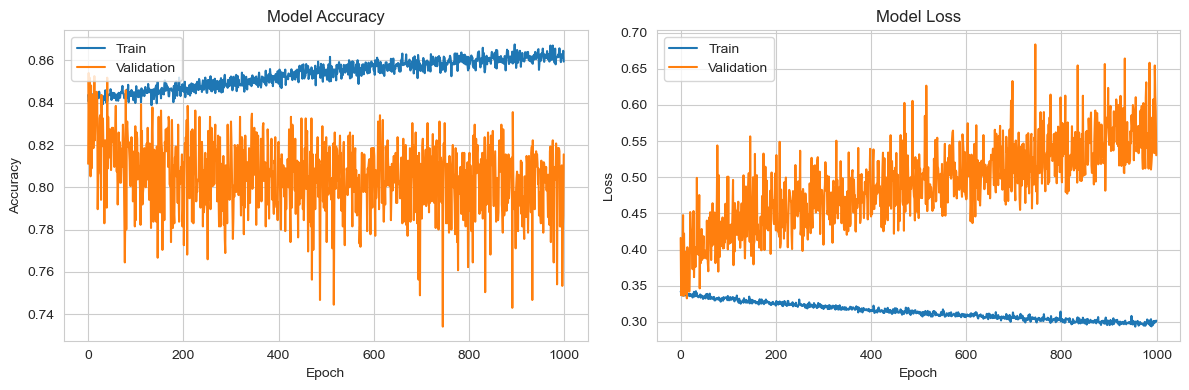

In [48]:
# Plot training history for the model
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [49]:
# Predict using the test data
y_pred = (model_with_weights.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Generate classification report
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_report_str}')

32/32 [==============================] - 0s 1ms/step
Accuracy: 0.756
Confusion Matrix:
[[636 160]
 [ 84 120]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       796
           1       0.43      0.59      0.50       204

    accuracy                           0.76      1000
   macro avg       0.66      0.69      0.67      1000
weighted avg       0.79      0.76      0.77      1000



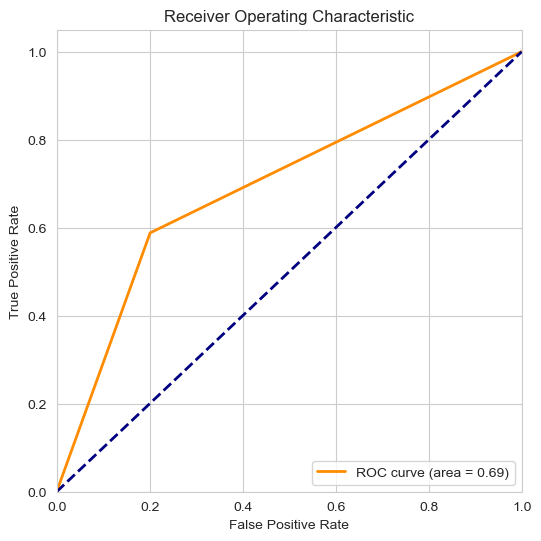

In [50]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [52]:
from tensorflow.keras.optimizers import Adam

# Define a higher learning rate
higher_learning_rate = 0.01

# Create the model
model_high_lr = Sequential()

# Add layers to the model
model_high_lr.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model_high_lr.add(Dense(32, activation="relu"))
model_high_lr.add(Dense(16, activation="relu"))
model_high_lr.add(Dense(1, activation="sigmoid"))

# Compile the model with the Adam optimizer and the increased learning rate
model_high_lr.compile(optimizer=Adam(learning_rate=higher_learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
# Train the model with class weights and validation split
history_high_lr = model_high_lr.fit(
    X_train,
    y_train,
    validation_split=0.15,
    epochs=1000,
    batch_size=64,
    class_weight={0: class_weights[0], 1: class_weights[1]}
)

Epoch 1/1000
120/120 [==============================] - 1s 4ms/step - loss: 0.6388 - accuracy: 0.6559 - val_loss: 0.6693 - val_accuracy: 0.6089
Epoch 2/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5483 - accuracy: 0.7335 - val_loss: 0.5649 - val_accuracy: 0.7000
Epoch 3/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.5067 - accuracy: 0.7578 - val_loss: 0.4845 - val_accuracy: 0.7652
Epoch 4/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.4894 - accuracy: 0.7714 - val_loss: 0.4693 - val_accuracy: 0.8037
Epoch 5/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.4857 - accuracy: 0.7779 - val_loss: 0.4462 - val_accuracy: 0.7726
Epoch 6/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.4879 - accuracy: 0.7690 - val_loss: 0.4466 - val_accuracy: 0.7659
Epoch 7/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.7741 - val_loss: 0.4471 - val_accuracy:

120/120 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.8071 - val_loss: 0.4673 - val_accuracy: 0.7852
Epoch 58/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.8033 - val_loss: 0.4877 - val_accuracy: 0.7719
Epoch 59/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.8026 - val_loss: 0.4913 - val_accuracy: 0.7770
Epoch 60/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.8003 - val_loss: 0.4363 - val_accuracy: 0.8000
Epoch 61/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.7978 - val_loss: 0.4695 - val_accuracy: 0.7748
Epoch 62/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.8004 - val_loss: 0.4974 - val_accuracy: 0.7674
Epoch 63/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.4276 - accuracy: 0.8018 - val_loss: 0.4711 - val_accuracy: 0.7852

120/120 [==============================] - 0s 3ms/step - loss: 0.4046 - accuracy: 0.8064 - val_loss: 0.4960 - val_accuracy: 0.7874
Epoch 114/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.4001 - accuracy: 0.8116 - val_loss: 0.4443 - val_accuracy: 0.8126
Epoch 115/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.4045 - accuracy: 0.8097 - val_loss: 0.4253 - val_accuracy: 0.8104
Epoch 116/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3932 - accuracy: 0.8148 - val_loss: 0.4653 - val_accuracy: 0.8037
Epoch 117/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.4012 - accuracy: 0.8139 - val_loss: 0.4835 - val_accuracy: 0.7911
Epoch 118/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3945 - accuracy: 0.8122 - val_loss: 0.4770 - val_accuracy: 0.7941
Epoch 119/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.4032 - accuracy: 0.8150 - val_loss: 0.5137 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.3797 - accuracy: 0.8111 - val_loss: 0.4824 - val_accuracy: 0.8007
Epoch 170/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3749 - accuracy: 0.8154 - val_loss: 0.4747 - val_accuracy: 0.7993
Epoch 171/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3701 - accuracy: 0.8212 - val_loss: 0.5606 - val_accuracy: 0.7452
Epoch 172/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3696 - accuracy: 0.8107 - val_loss: 0.5365 - val_accuracy: 0.7637
Epoch 173/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3684 - accuracy: 0.8183 - val_loss: 0.5135 - val_accuracy: 0.7793
Epoch 174/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3666 - accuracy: 0.8154 - val_loss: 0.5710 - val_accuracy: 0.7593
Epoch 175/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3764 - accuracy: 0.8209 - val_loss: 0.5224 - val_accuracy: 

120/120 [==============================] - 0s 3ms/step - loss: 0.3563 - accuracy: 0.8212 - val_loss: 0.5270 - val_accuracy: 0.7711
Epoch 226/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.8212 - val_loss: 0.5254 - val_accuracy: 0.7770
Epoch 227/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3634 - accuracy: 0.8114 - val_loss: 0.5369 - val_accuracy: 0.7785
Epoch 228/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3591 - accuracy: 0.8170 - val_loss: 0.5254 - val_accuracy: 0.7741
Epoch 229/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3590 - accuracy: 0.8144 - val_loss: 0.5462 - val_accuracy: 0.7578
Epoch 230/1000
120/120 [==============================] - 0s 4ms/step - loss: 0.3595 - accuracy: 0.8132 - val_loss: 0.5689 - val_accuracy: 0.7563
Epoch 231/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3555 - accuracy: 0.8167 - val_loss: 0.5498 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.3462 - accuracy: 0.8099 - val_loss: 0.5955 - val_accuracy: 0.7526
Epoch 282/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3548 - accuracy: 0.8082 - val_loss: 0.5639 - val_accuracy: 0.7481
Epoch 283/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8178 - val_loss: 0.5847 - val_accuracy: 0.7422
Epoch 284/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3578 - accuracy: 0.8082 - val_loss: 0.5517 - val_accuracy: 0.7622
Epoch 285/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.8140 - val_loss: 0.5625 - val_accuracy: 0.7459
Epoch 286/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8136 - val_loss: 0.5936 - val_accuracy: 0.7607
Epoch 287/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3559 - accuracy: 0.7997 - val_loss: 0.5749 - val_accuracy: 

120/120 [==============================] - 0s 3ms/step - loss: 0.3516 - accuracy: 0.8052 - val_loss: 0.6009 - val_accuracy: 0.7133
Epoch 338/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3437 - accuracy: 0.8123 - val_loss: 0.5689 - val_accuracy: 0.7600
Epoch 339/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.8141 - val_loss: 0.5474 - val_accuracy: 0.7778
Epoch 340/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.8093 - val_loss: 0.5193 - val_accuracy: 0.7659
Epoch 341/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3492 - accuracy: 0.8136 - val_loss: 0.5651 - val_accuracy: 0.7489
Epoch 342/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.8108 - val_loss: 0.5568 - val_accuracy: 0.7437
Epoch 343/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3393 - accuracy: 0.8153 - val_loss: 0.5974 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.3221 - accuracy: 0.8226 - val_loss: 0.6275 - val_accuracy: 0.7422
Epoch 394/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8065 - val_loss: 0.6106 - val_accuracy: 0.7393
Epoch 395/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3418 - accuracy: 0.8110 - val_loss: 0.6024 - val_accuracy: 0.7556
Epoch 396/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3317 - accuracy: 0.8116 - val_loss: 0.5885 - val_accuracy: 0.7637
Epoch 397/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3536 - accuracy: 0.8114 - val_loss: 0.6132 - val_accuracy: 0.7541
Epoch 398/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3348 - accuracy: 0.8210 - val_loss: 0.6113 - val_accuracy: 0.7430
Epoch 399/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3287 - accuracy: 0.8080 - val_loss: 0.6400 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8125 - val_loss: 0.6455 - val_accuracy: 0.7763
Epoch 450/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8148 - val_loss: 0.6633 - val_accuracy: 0.7615
Epoch 451/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3285 - accuracy: 0.8259 - val_loss: 0.6333 - val_accuracy: 0.7296
Epoch 452/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3256 - accuracy: 0.8169 - val_loss: 0.6491 - val_accuracy: 0.7422
Epoch 453/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3261 - accuracy: 0.8220 - val_loss: 0.6646 - val_accuracy: 0.7274
Epoch 454/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3351 - accuracy: 0.8161 - val_loss: 0.6705 - val_accuracy: 0.7274
Epoch 455/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.8230 - val_loss: 0.6656 - val_accuracy: 

120/120 [==============================] - 0s 4ms/step - loss: 0.3260 - accuracy: 0.8222 - val_loss: 0.6445 - val_accuracy: 0.7652
Epoch 506/1000
120/120 [==============================] - 0s 4ms/step - loss: 0.3266 - accuracy: 0.8237 - val_loss: 0.6625 - val_accuracy: 0.7504
Epoch 507/1000
120/120 [==============================] - 0s 4ms/step - loss: 0.3232 - accuracy: 0.8252 - val_loss: 0.6785 - val_accuracy: 0.7326
Epoch 508/1000
120/120 [==============================] - 0s 4ms/step - loss: 0.3123 - accuracy: 0.8260 - val_loss: 0.6448 - val_accuracy: 0.7548
Epoch 509/1000
120/120 [==============================] - 0s 4ms/step - loss: 0.3125 - accuracy: 0.8256 - val_loss: 0.7038 - val_accuracy: 0.7356
Epoch 510/1000
120/120 [==============================] - 0s 4ms/step - loss: 0.3314 - accuracy: 0.8165 - val_loss: 0.6949 - val_accuracy: 0.7407
Epoch 511/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3245 - accuracy: 0.8156 - val_loss: 0.6478 - val_accuracy: 

120/120 [==============================] - 0s 3ms/step - loss: 0.3095 - accuracy: 0.8275 - val_loss: 0.6629 - val_accuracy: 0.7556
Epoch 562/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3075 - accuracy: 0.8328 - val_loss: 0.6936 - val_accuracy: 0.7244
Epoch 563/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3153 - accuracy: 0.8221 - val_loss: 0.6916 - val_accuracy: 0.7541
Epoch 564/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3201 - accuracy: 0.8284 - val_loss: 0.6867 - val_accuracy: 0.7141
Epoch 565/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3178 - accuracy: 0.8217 - val_loss: 0.6521 - val_accuracy: 0.7630
Epoch 566/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3214 - accuracy: 0.8214 - val_loss: 0.6519 - val_accuracy: 0.7637
Epoch 567/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.8242 - val_loss: 0.6594 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.3063 - accuracy: 0.8323 - val_loss: 0.7066 - val_accuracy: 0.7459
Epoch 618/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.8263 - val_loss: 0.6858 - val_accuracy: 0.7348
Epoch 619/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8237 - val_loss: 0.6579 - val_accuracy: 0.7296
Epoch 620/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.8218 - val_loss: 0.6334 - val_accuracy: 0.7319
Epoch 621/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3092 - accuracy: 0.8290 - val_loss: 0.6598 - val_accuracy: 0.7496
Epoch 622/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.8288 - val_loss: 0.6680 - val_accuracy: 0.7385
Epoch 623/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.8258 - val_loss: 0.6691 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.3073 - accuracy: 0.8259 - val_loss: 0.7019 - val_accuracy: 0.7593
Epoch 674/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3109 - accuracy: 0.8320 - val_loss: 0.7048 - val_accuracy: 0.7563
Epoch 675/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3101 - accuracy: 0.8292 - val_loss: 0.7306 - val_accuracy: 0.7459
Epoch 676/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3065 - accuracy: 0.8327 - val_loss: 0.7477 - val_accuracy: 0.7533
Epoch 677/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.2982 - accuracy: 0.8344 - val_loss: 0.7710 - val_accuracy: 0.7237
Epoch 678/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.2972 - accuracy: 0.8335 - val_loss: 0.7698 - val_accuracy: 0.7615
Epoch 679/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3096 - accuracy: 0.8289 - val_loss: 0.7672 - val_accuracy: 

120/120 [==============================] - 0s 3ms/step - loss: 0.3005 - accuracy: 0.8297 - val_loss: 0.7354 - val_accuracy: 0.7237
Epoch 730/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3032 - accuracy: 0.8297 - val_loss: 0.7632 - val_accuracy: 0.7207
Epoch 731/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3070 - accuracy: 0.8280 - val_loss: 0.7557 - val_accuracy: 0.7467
Epoch 732/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3046 - accuracy: 0.8367 - val_loss: 0.7310 - val_accuracy: 0.7407
Epoch 733/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3001 - accuracy: 0.8354 - val_loss: 0.7392 - val_accuracy: 0.7378
Epoch 734/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3311 - accuracy: 0.8242 - val_loss: 0.7172 - val_accuracy: 0.7185
Epoch 735/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8269 - val_loss: 0.6935 - val_accuracy: 

120/120 [==============================] - 0s 3ms/step - loss: 0.3163 - accuracy: 0.8191 - val_loss: 0.7601 - val_accuracy: 0.7607
Epoch 786/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3118 - accuracy: 0.8328 - val_loss: 0.7849 - val_accuracy: 0.7407
Epoch 787/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3011 - accuracy: 0.8322 - val_loss: 0.7455 - val_accuracy: 0.7533
Epoch 788/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3033 - accuracy: 0.8376 - val_loss: 0.7836 - val_accuracy: 0.7422
Epoch 789/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3002 - accuracy: 0.8322 - val_loss: 0.7771 - val_accuracy: 0.7563
Epoch 790/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2956 - accuracy: 0.8349 - val_loss: 0.7992 - val_accuracy: 0.7570
Epoch 791/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.3114 - accuracy: 0.8305 - val_loss: 0.7904 - val_accuracy: 

120/120 [==============================] - 0s 4ms/step - loss: 0.3224 - accuracy: 0.8325 - val_loss: 0.7025 - val_accuracy: 0.7222
Epoch 842/1000
120/120 [==============================] - 0s 4ms/step - loss: 0.3020 - accuracy: 0.8344 - val_loss: 0.7643 - val_accuracy: 0.7244
Epoch 843/1000
120/120 [==============================] - 0s 4ms/step - loss: 0.2934 - accuracy: 0.8324 - val_loss: 0.7970 - val_accuracy: 0.7200
Epoch 844/1000
120/120 [==============================] - 0s 4ms/step - loss: 0.2992 - accuracy: 0.8303 - val_loss: 0.8104 - val_accuracy: 0.7304
Epoch 845/1000
120/120 [==============================] - 1s 4ms/step - loss: 0.2921 - accuracy: 0.8337 - val_loss: 0.7739 - val_accuracy: 0.7541
Epoch 846/1000
120/120 [==============================] - 0s 4ms/step - loss: 0.3013 - accuracy: 0.8331 - val_loss: 0.7585 - val_accuracy: 0.7422
Epoch 847/1000
120/120 [==============================] - 0s 4ms/step - loss: 0.2980 - accuracy: 0.8329 - val_loss: 0.7861 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.2896 - accuracy: 0.8378 - val_loss: 0.7826 - val_accuracy: 0.7215
Epoch 898/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2958 - accuracy: 0.8392 - val_loss: 0.7795 - val_accuracy: 0.7622
Epoch 899/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.8387 - val_loss: 0.8241 - val_accuracy: 0.7059
Epoch 900/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2861 - accuracy: 0.8349 - val_loss: 0.8197 - val_accuracy: 0.7578
Epoch 901/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2921 - accuracy: 0.8404 - val_loss: 0.8117 - val_accuracy: 0.7333
Epoch 902/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2904 - accuracy: 0.8388 - val_loss: 0.8528 - val_accuracy: 0.7459
Epoch 903/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2942 - accuracy: 0.8397 - val_loss: 0.8314 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8276 - val_loss: 0.7808 - val_accuracy: 0.7474
Epoch 954/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2938 - accuracy: 0.8340 - val_loss: 0.8392 - val_accuracy: 0.7459
Epoch 955/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3016 - accuracy: 0.8322 - val_loss: 0.8268 - val_accuracy: 0.7230
Epoch 956/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.3032 - accuracy: 0.8312 - val_loss: 0.7800 - val_accuracy: 0.7222
Epoch 957/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2939 - accuracy: 0.8395 - val_loss: 0.8346 - val_accuracy: 0.7385
Epoch 958/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2906 - accuracy: 0.8366 - val_loss: 0.8439 - val_accuracy: 0.7111
Epoch 959/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2953 - accuracy: 0.8354 - val_loss: 0.8760 - val_accuracy: 

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [54]:
# Predict using the test data
y_pred_change_lr = (model_high_lr.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy_change_lr = accuracy_score(y_test, y_pred_change_lr)

# Calculate confusion matrix
confusion_change_lr = confusion_matrix(y_test, y_pred_change_lr)

# Generate classification report
classification_report_change_lr = classification_report(y_test, y_pred_change_lr)

print("Model Evaluation with Increased Learning Rate:")
print(f'Accuracy: {accuracy_change_lr}')
print(f'Confusion Matrix:\n{confusion_change_lr}')
print(f'Classification Report:\n{classification_report_change_lr}')


32/32 [==============================] - 0s 1ms/step
Model Evaluation with Increased Learning Rate:
Accuracy: 0.737
Confusion Matrix:
[[605 191]
 [ 72 132]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       796
           1       0.41      0.65      0.50       204

    accuracy                           0.74      1000
   macro avg       0.65      0.70      0.66      1000
weighted avg       0.79      0.74      0.76      1000



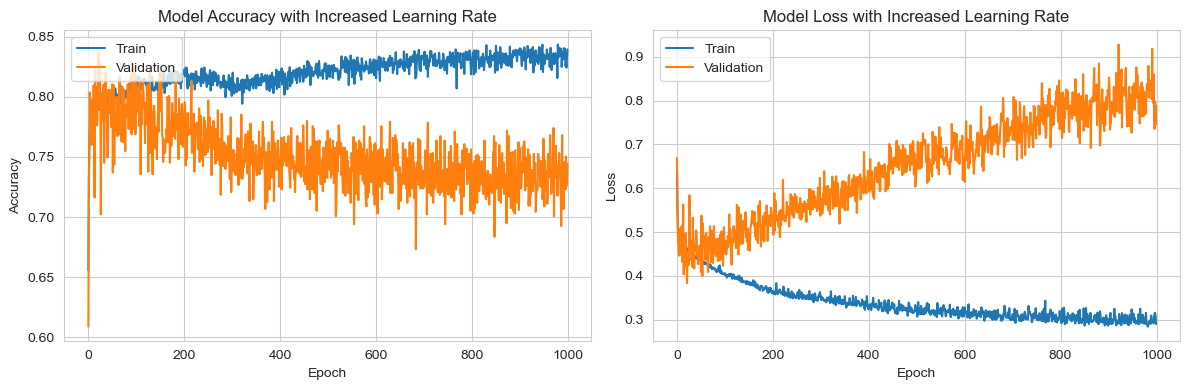

In [55]:
import matplotlib.pyplot as plt

# Plot training history for the model with an increased learning rate
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_high_lr.history['accuracy'])
plt.plot(history_high_lr.history['val_accuracy'])
plt.title('Model Accuracy with Increased Learning Rate')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_high_lr.history['loss'])
plt.plot(history_high_lr.history['val_loss'])
plt.title('Model Loss with Increased Learning Rate')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

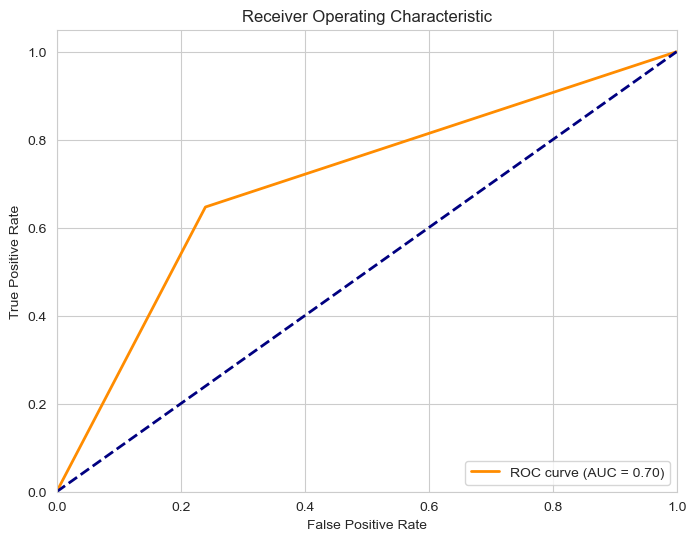

In [57]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_change_lr)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Add Dropout Layer

In [60]:
# Create the model
model_with_dropout = Sequential()

# Add layers to the model
model_with_dropout.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model_with_dropout.add(Dropout(0.5))  # Add dropout layer with a dropout rate of 0.5
model_with_dropout.add(Dense(32, activation="relu"))
model_with_dropout.add(Dropout(0.5))  # Add dropout layer with a dropout rate of 0.5
model_with_dropout.add(Dense(16, activation="relu"))
model_with_dropout.add(Dropout(0.5))  # Add dropout layer with a dropout rate of 0.5
model_with_dropout.add(Dense(1, activation="sigmoid"))

# Compile the model with the desired optimizer and loss function
model_with_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [61]:
# Train the model with class weights and validation split
history_with_dropout = model_with_dropout.fit(
    X_train,
    y_train,
    validation_split=0.15,
    epochs=1000,
    batch_size=64,
    class_weight={0: class_weights[0], 1: class_weights[1]}
)

Epoch 1/1000
120/120 [==============================] - 1s 4ms/step - loss: 0.7120 - accuracy: 0.6230 - val_loss: 0.7087 - val_accuracy: 0.2111
Epoch 2/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4844 - val_loss: 0.7144 - val_accuracy: 0.2141
Epoch 3/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5125 - val_loss: 0.7081 - val_accuracy: 0.2896
Epoch 4/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.6842 - accuracy: 0.5332 - val_loss: 0.7055 - val_accuracy: 0.3496
Epoch 5/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.5075 - val_loss: 0.6975 - val_accuracy: 0.4363
Epoch 6/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.5157 - val_loss: 0.6887 - val_accuracy: 0.5000
Epoch 7/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.6767 - accuracy: 0.5261 - val_loss: 0.6992 - val_accuracy:

120/120 [==============================] - 0s 3ms/step - loss: 0.5939 - accuracy: 0.6759 - val_loss: 0.5851 - val_accuracy: 0.7163
Epoch 58/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5919 - accuracy: 0.6753 - val_loss: 0.6085 - val_accuracy: 0.6867
Epoch 59/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.6025 - accuracy: 0.6637 - val_loss: 0.6126 - val_accuracy: 0.6889
Epoch 60/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5951 - accuracy: 0.6626 - val_loss: 0.6032 - val_accuracy: 0.6933
Epoch 61/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5930 - accuracy: 0.6656 - val_loss: 0.5840 - val_accuracy: 0.7178
Epoch 62/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5889 - accuracy: 0.6797 - val_loss: 0.6077 - val_accuracy: 0.6874
Epoch 63/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5946 - accuracy: 0.6646 - val_loss: 0.5966 - val_accuracy: 0.7000

120/120 [==============================] - 0s 3ms/step - loss: 0.5868 - accuracy: 0.6792 - val_loss: 0.6151 - val_accuracy: 0.7007
Epoch 114/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.5889 - accuracy: 0.6858 - val_loss: 0.6172 - val_accuracy: 0.6978
Epoch 115/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.5845 - accuracy: 0.6880 - val_loss: 0.6230 - val_accuracy: 0.6948
Epoch 116/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.5823 - accuracy: 0.6928 - val_loss: 0.6091 - val_accuracy: 0.7104
Epoch 117/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5820 - accuracy: 0.6935 - val_loss: 0.6247 - val_accuracy: 0.6852
Epoch 118/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.5840 - accuracy: 0.6877 - val_loss: 0.6154 - val_accuracy: 0.6889
Epoch 119/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5790 - accuracy: 0.6872 - val_loss: 0.6101 - val_accuracy: 

120/120 [==============================] - 0s 3ms/step - loss: 0.5757 - accuracy: 0.6940 - val_loss: 0.6024 - val_accuracy: 0.6993
Epoch 170/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5797 - accuracy: 0.7010 - val_loss: 0.5906 - val_accuracy: 0.7259
Epoch 171/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.6990 - val_loss: 0.5913 - val_accuracy: 0.7170
Epoch 172/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5794 - accuracy: 0.7041 - val_loss: 0.6172 - val_accuracy: 0.6963
Epoch 173/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5841 - accuracy: 0.6889 - val_loss: 0.6189 - val_accuracy: 0.6911
Epoch 174/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5733 - accuracy: 0.7092 - val_loss: 0.6268 - val_accuracy: 0.6793
Epoch 175/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5720 - accuracy: 0.6948 - val_loss: 0.6086 - val_accuracy: 

120/120 [==============================] - 0s 4ms/step - loss: 0.5723 - accuracy: 0.6950 - val_loss: 0.5847 - val_accuracy: 0.7252
Epoch 226/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5695 - accuracy: 0.7050 - val_loss: 0.5954 - val_accuracy: 0.7104
Epoch 227/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5687 - accuracy: 0.6961 - val_loss: 0.5623 - val_accuracy: 0.7548
Epoch 228/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5728 - accuracy: 0.6991 - val_loss: 0.5942 - val_accuracy: 0.7111
Epoch 229/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.7013 - val_loss: 0.5948 - val_accuracy: 0.7096
Epoch 230/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5771 - accuracy: 0.6935 - val_loss: 0.5861 - val_accuracy: 0.7363
Epoch 231/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5719 - accuracy: 0.7008 - val_loss: 0.5920 - val_accuracy: 

120/120 [==============================] - 0s 4ms/step - loss: 0.5747 - accuracy: 0.7065 - val_loss: 0.5714 - val_accuracy: 0.7526
Epoch 282/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5715 - accuracy: 0.7080 - val_loss: 0.5916 - val_accuracy: 0.7370
Epoch 283/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5684 - accuracy: 0.7025 - val_loss: 0.5830 - val_accuracy: 0.7385
Epoch 284/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5643 - accuracy: 0.7129 - val_loss: 0.5807 - val_accuracy: 0.7415
Epoch 285/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5654 - accuracy: 0.7120 - val_loss: 0.5643 - val_accuracy: 0.7481
Epoch 286/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5632 - accuracy: 0.7107 - val_loss: 0.5932 - val_accuracy: 0.7333
Epoch 287/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5680 - accuracy: 0.7069 - val_loss: 0.5702 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.7043 - val_loss: 0.5483 - val_accuracy: 0.7644
Epoch 338/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.5640 - accuracy: 0.7140 - val_loss: 0.5671 - val_accuracy: 0.7585
Epoch 339/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.5580 - accuracy: 0.7162 - val_loss: 0.5668 - val_accuracy: 0.7481
Epoch 340/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5671 - accuracy: 0.7108 - val_loss: 0.5646 - val_accuracy: 0.7504
Epoch 341/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.5562 - accuracy: 0.7161 - val_loss: 0.5751 - val_accuracy: 0.7407
Epoch 342/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5614 - accuracy: 0.7094 - val_loss: 0.5569 - val_accuracy: 0.7541
Epoch 343/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5629 - accuracy: 0.7119 - val_loss: 0.5636 - val_accuracy: 

120/120 [==============================] - 0s 3ms/step - loss: 0.5630 - accuracy: 0.7159 - val_loss: 0.5493 - val_accuracy: 0.7837
Epoch 394/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5527 - accuracy: 0.7259 - val_loss: 0.5597 - val_accuracy: 0.7459
Epoch 395/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5588 - accuracy: 0.7088 - val_loss: 0.5846 - val_accuracy: 0.7422
Epoch 396/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5587 - accuracy: 0.7112 - val_loss: 0.5694 - val_accuracy: 0.7437
Epoch 397/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5622 - accuracy: 0.7076 - val_loss: 0.5702 - val_accuracy: 0.7452
Epoch 398/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5585 - accuracy: 0.7157 - val_loss: 0.5736 - val_accuracy: 0.7393
Epoch 399/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5549 - accuracy: 0.7114 - val_loss: 0.5428 - val_accuracy: 

120/120 [==============================] - 0s 4ms/step - loss: 0.5552 - accuracy: 0.7167 - val_loss: 0.5506 - val_accuracy: 0.7504
Epoch 450/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5561 - accuracy: 0.7038 - val_loss: 0.5751 - val_accuracy: 0.7207
Epoch 451/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5589 - accuracy: 0.7075 - val_loss: 0.5972 - val_accuracy: 0.7252
Epoch 452/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5523 - accuracy: 0.7069 - val_loss: 0.5423 - val_accuracy: 0.7526
Epoch 453/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5545 - accuracy: 0.7064 - val_loss: 0.5490 - val_accuracy: 0.7504
Epoch 454/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5648 - accuracy: 0.6996 - val_loss: 0.5872 - val_accuracy: 0.7274
Epoch 455/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5649 - accuracy: 0.6982 - val_loss: 0.5801 - val_accuracy: 

120/120 [==============================] - 0s 3ms/step - loss: 0.5619 - accuracy: 0.7024 - val_loss: 0.5536 - val_accuracy: 0.7741
Epoch 506/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5575 - accuracy: 0.7148 - val_loss: 0.5597 - val_accuracy: 0.7674
Epoch 507/1000
120/120 [==============================] - 0s 4ms/step - loss: 0.5625 - accuracy: 0.7237 - val_loss: 0.5698 - val_accuracy: 0.7733
Epoch 508/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5625 - accuracy: 0.7111 - val_loss: 0.5656 - val_accuracy: 0.7541
Epoch 509/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5543 - accuracy: 0.7108 - val_loss: 0.5347 - val_accuracy: 0.7763
Epoch 510/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5629 - accuracy: 0.7120 - val_loss: 0.5674 - val_accuracy: 0.7541
Epoch 511/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5549 - accuracy: 0.7169 - val_loss: 0.5552 - val_accuracy: 

120/120 [==============================] - 0s 3ms/step - loss: 0.5535 - accuracy: 0.7196 - val_loss: 0.5510 - val_accuracy: 0.7689
Epoch 562/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5571 - accuracy: 0.7125 - val_loss: 0.5439 - val_accuracy: 0.7748
Epoch 563/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5604 - accuracy: 0.7222 - val_loss: 0.5788 - val_accuracy: 0.7504
Epoch 564/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5662 - accuracy: 0.7103 - val_loss: 0.5693 - val_accuracy: 0.7644
Epoch 565/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5547 - accuracy: 0.7173 - val_loss: 0.5647 - val_accuracy: 0.7630
Epoch 566/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5576 - accuracy: 0.7149 - val_loss: 0.5760 - val_accuracy: 0.7519
Epoch 567/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5593 - accuracy: 0.7061 - val_loss: 0.5576 - val_accuracy: 

120/120 [==============================] - 0s 3ms/step - loss: 0.5599 - accuracy: 0.7234 - val_loss: 0.5831 - val_accuracy: 0.7556
Epoch 618/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5599 - accuracy: 0.7182 - val_loss: 0.5668 - val_accuracy: 0.7600
Epoch 619/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5571 - accuracy: 0.7222 - val_loss: 0.5597 - val_accuracy: 0.7726
Epoch 620/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5577 - accuracy: 0.7332 - val_loss: 0.5714 - val_accuracy: 0.7696
Epoch 621/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5592 - accuracy: 0.7183 - val_loss: 0.5416 - val_accuracy: 0.7815
Epoch 622/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5563 - accuracy: 0.7231 - val_loss: 0.5635 - val_accuracy: 0.7622
Epoch 623/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5613 - accuracy: 0.7088 - val_loss: 0.5673 - val_accuracy: 

120/120 [==============================] - 0s 3ms/step - loss: 0.5636 - accuracy: 0.7102 - val_loss: 0.5733 - val_accuracy: 0.7496
Epoch 674/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.5605 - accuracy: 0.7119 - val_loss: 0.5555 - val_accuracy: 0.7585
Epoch 675/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5555 - accuracy: 0.7227 - val_loss: 0.5687 - val_accuracy: 0.7570
Epoch 676/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5578 - accuracy: 0.7107 - val_loss: 0.5719 - val_accuracy: 0.7548
Epoch 677/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5474 - accuracy: 0.7233 - val_loss: 0.5614 - val_accuracy: 0.7563
Epoch 678/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5637 - accuracy: 0.7050 - val_loss: 0.5740 - val_accuracy: 0.7630
Epoch 679/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5642 - accuracy: 0.7025 - val_loss: 0.5774 - val_accuracy: 

120/120 [==============================] - 0s 3ms/step - loss: 0.5608 - accuracy: 0.7068 - val_loss: 0.5597 - val_accuracy: 0.7681
Epoch 730/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5562 - accuracy: 0.7169 - val_loss: 0.5426 - val_accuracy: 0.7711
Epoch 731/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5565 - accuracy: 0.7179 - val_loss: 0.5765 - val_accuracy: 0.7541
Epoch 732/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5474 - accuracy: 0.7193 - val_loss: 0.5435 - val_accuracy: 0.7719
Epoch 733/1000
120/120 [==============================] - 0s 4ms/step - loss: 0.5475 - accuracy: 0.7196 - val_loss: 0.5626 - val_accuracy: 0.7652
Epoch 734/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5536 - accuracy: 0.7129 - val_loss: 0.5399 - val_accuracy: 0.7778
Epoch 735/1000
120/120 [==============================] - 0s 4ms/step - loss: 0.5674 - accuracy: 0.7058 - val_loss: 0.5755 - val_accuracy: 

120/120 [==============================] - 0s 3ms/step - loss: 0.5563 - accuracy: 0.7141 - val_loss: 0.5649 - val_accuracy: 0.7667
Epoch 786/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5652 - accuracy: 0.7196 - val_loss: 0.5745 - val_accuracy: 0.7726
Epoch 787/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.7209 - val_loss: 0.5616 - val_accuracy: 0.7689
Epoch 788/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5587 - accuracy: 0.7176 - val_loss: 0.5664 - val_accuracy: 0.7689
Epoch 789/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5582 - accuracy: 0.7106 - val_loss: 0.5461 - val_accuracy: 0.7815
Epoch 790/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5564 - accuracy: 0.7221 - val_loss: 0.5617 - val_accuracy: 0.7704
Epoch 791/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5648 - accuracy: 0.7084 - val_loss: 0.5621 - val_accuracy: 

120/120 [==============================] - 0s 3ms/step - loss: 0.5548 - accuracy: 0.7125 - val_loss: 0.5456 - val_accuracy: 0.7881
Epoch 842/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5603 - accuracy: 0.7141 - val_loss: 0.5627 - val_accuracy: 0.7719
Epoch 843/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5581 - accuracy: 0.7176 - val_loss: 0.5618 - val_accuracy: 0.7763
Epoch 844/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5599 - accuracy: 0.7186 - val_loss: 0.5610 - val_accuracy: 0.7652
Epoch 845/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5654 - accuracy: 0.7128 - val_loss: 0.5984 - val_accuracy: 0.7496
Epoch 846/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5622 - accuracy: 0.7152 - val_loss: 0.5890 - val_accuracy: 0.7600
Epoch 847/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5584 - accuracy: 0.7120 - val_loss: 0.5697 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.5481 - accuracy: 0.7234 - val_loss: 0.5685 - val_accuracy: 0.7474
Epoch 898/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.5644 - accuracy: 0.7075 - val_loss: 0.5702 - val_accuracy: 0.7667
Epoch 899/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.5607 - accuracy: 0.7169 - val_loss: 0.5875 - val_accuracy: 0.7593
Epoch 900/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.5615 - accuracy: 0.7114 - val_loss: 0.5974 - val_accuracy: 0.7415
Epoch 901/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.5612 - accuracy: 0.7110 - val_loss: 0.5742 - val_accuracy: 0.7630
Epoch 902/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.5544 - accuracy: 0.7216 - val_loss: 0.5626 - val_accuracy: 0.7644
Epoch 903/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.5589 - accuracy: 0.7184 - val_loss: 0.5673 - val_accuracy: 

120/120 [==============================] - 0s 2ms/step - loss: 0.5552 - accuracy: 0.7115 - val_loss: 0.5488 - val_accuracy: 0.7748
Epoch 954/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.5565 - accuracy: 0.7170 - val_loss: 0.5686 - val_accuracy: 0.7770
Epoch 955/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.7258 - val_loss: 0.5310 - val_accuracy: 0.7978
Epoch 956/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5544 - accuracy: 0.7241 - val_loss: 0.5563 - val_accuracy: 0.7815
Epoch 957/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.5563 - accuracy: 0.7199 - val_loss: 0.5596 - val_accuracy: 0.7793
Epoch 958/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.5494 - accuracy: 0.7190 - val_loss: 0.5615 - val_accuracy: 0.7726
Epoch 959/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.5612 - accuracy: 0.7136 - val_loss: 0.5624 - val_accuracy: 

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

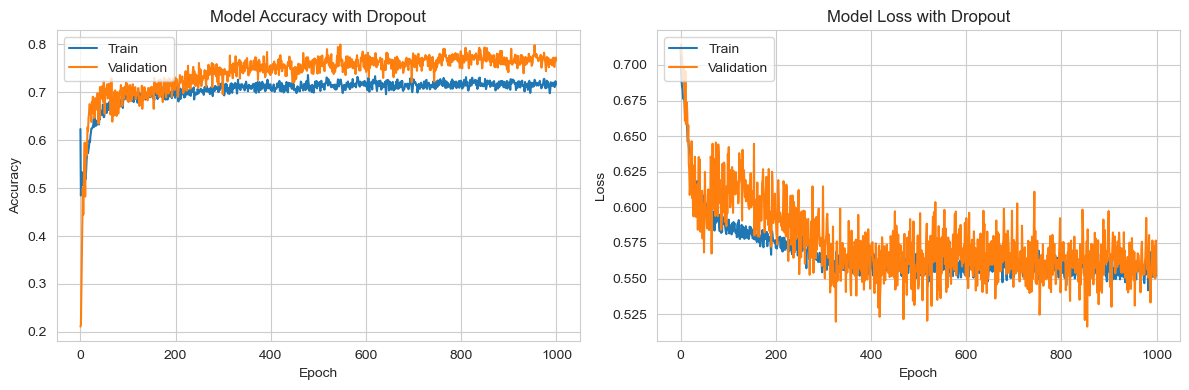

In [62]:
import matplotlib.pyplot as plt

# Plot training history for the model with dropout
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_with_dropout.history['accuracy'])
plt.plot(history_with_dropout.history['val_accuracy'])
plt.title('Model Accuracy with Dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_with_dropout.history['loss'])
plt.plot(history_with_dropout.history['val_loss'])
plt.title('Model Loss with Dropout')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [63]:
# Predict using the test data
y_pred_with_dropout = (model_with_dropout.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy_with_dropout = accuracy_score(y_test, y_pred_with_dropout)

# Calculate confusion matrix
confusion_with_dropout = confusion_matrix(y_test, y_pred_with_dropout)

# Generate classification report
classification_report_with_dropout = classification_report(y_test, y_pred_with_dropout)

print("Model Evaluation with Dropout:")
print(f'Accuracy: {accuracy_with_dropout}')
print(f'Confusion Matrix:\n{confusion_with_dropout}')
print(f'Classification Report:\n{classification_report_with_dropout}')


32/32 [==============================] - 0s 1ms/step
Model Evaluation with Dropout:
Accuracy: 0.752
Confusion Matrix:
[[605 191]
 [ 57 147]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       796
           1       0.43      0.72      0.54       204

    accuracy                           0.75      1000
   macro avg       0.67      0.74      0.69      1000
weighted avg       0.82      0.75      0.77      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

# Create the model
model_with_early_stopping = Sequential()

# Add layers to the model
model_with_early_stopping.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model_with_early_stopping.add(Dropout(0.5))
model_with_early_stopping.add(Dense(32, activation="relu"))
model_with_early_stopping.add(Dropout(0.5))
model_with_early_stopping.add(Dense(16, activation="relu"))
model_with_early_stopping.add(Dropout(0.5))
model_with_early_stopping.add(Dense(1, activation="sigmoid"))

# Compile the model
model_with_early_stopping.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [37]:
history_with_early_stopping = model_with_early_stopping.fit(
    X_train,
    y_train,
    validation_split=0.15,
    epochs=1000,
    batch_size=64,
    class_weight={0: class_weights[0], 1: class_weights[1]},
    callbacks=[early_stopping]  # Include the early stopping callback
)

Epoch 1/1000
120/120 [==============================] - 3s 8ms/step - loss: 0.7006 - accuracy: 0.5213 - val_loss: 0.6869 - val_accuracy: 0.5763
Epoch 2/1000
120/120 [==============================] - 1s 5ms/step - loss: 0.6936 - accuracy: 0.4571 - val_loss: 0.6880 - val_accuracy: 0.6311
Epoch 3/1000
120/120 [==============================] - 1s 6ms/step - loss: 0.6929 - accuracy: 0.5699 - val_loss: 0.6897 - val_accuracy: 0.5622
Epoch 4/1000
120/120 [==============================] - 1s 6ms/step - loss: 0.6884 - accuracy: 0.5128 - val_loss: 0.6865 - val_accuracy: 0.5489
Epoch 5/1000
120/120 [==============================] - 1s 5ms/step - loss: 0.6853 - accuracy: 0.5282 - val_loss: 0.6891 - val_accuracy: 0.5178
Epoch 6/1000
120/120 [==============================] - 1s 5ms/step - loss: 0.6794 - accuracy: 0.4844 - val_loss: 0.6676 - val_accuracy: 0.6585
Epoch 7/1000
120/120 [==============================] - 1s 6ms/step - loss: 0.6797 - accuracy: 0.5275 - val_loss: 0.6747 - val_accuracy:

120/120 [==============================] - 1s 5ms/step - loss: 0.5530 - accuracy: 0.7310 - val_loss: 0.5265 - val_accuracy: 0.7096
Epoch 58/1000
120/120 [==============================] - 1s 9ms/step - loss: 0.5602 - accuracy: 0.7303 - val_loss: 0.5082 - val_accuracy: 0.7393
Epoch 59/1000
120/120 [==============================] - 1s 5ms/step - loss: 0.5562 - accuracy: 0.7344 - val_loss: 0.5168 - val_accuracy: 0.7037
Epoch 60/1000
120/120 [==============================] - 1s 7ms/step - loss: 0.5536 - accuracy: 0.7359 - val_loss: 0.4986 - val_accuracy: 0.7593
Epoch 61/1000
120/120 [==============================] - 1s 7ms/step - loss: 0.5621 - accuracy: 0.7055 - val_loss: 0.5314 - val_accuracy: 0.7096
Epoch 62/1000
120/120 [==============================] - 1s 7ms/step - loss: 0.5548 - accuracy: 0.7280 - val_loss: 0.5286 - val_accuracy: 0.7207
Epoch 63/1000
120/120 [==============================] - 1s 6ms/step - loss: 0.5591 - accuracy: 0.7290 - val_loss: 0.5130 - val_accuracy: 0.7400

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

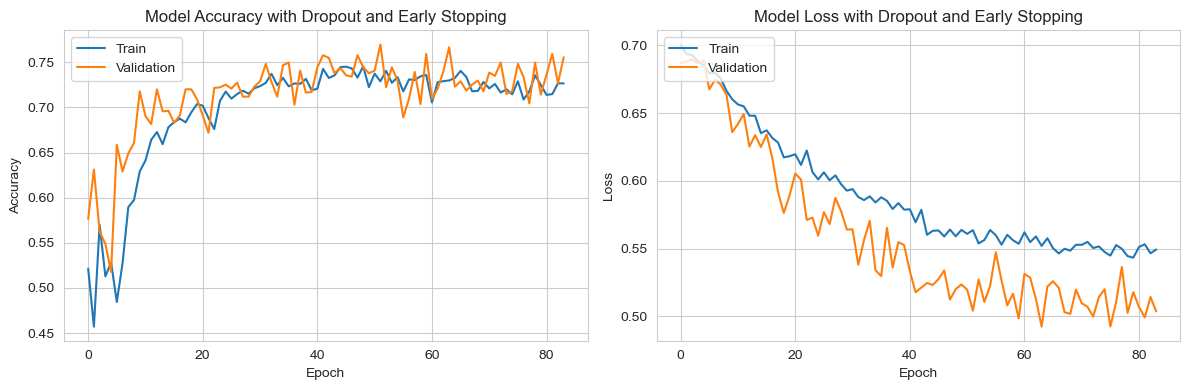

In [38]:
# Plot training history for the model with dropout and early stopping
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_with_early_stopping.history['accuracy'])
plt.plot(history_with_early_stopping.history['val_accuracy'])
plt.title('Model Accuracy with Dropout and Early Stopping')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_with_early_stopping.history['loss'])
plt.plot(history_with_early_stopping.history['val_loss'])
plt.title('Model Loss with Dropout and Early Stopping')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [43]:
# Predict using the test data
y_pred_with_early_stop = (model_with_early_stopping.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy_with_early_stop = accuracy_score(y_test, y_pred_with_early_stop)

# Calculate confusion matrix
confusion_with_early_stop = confusion_matrix(y_test, y_pred_with_early_stop)

# Generate classification report
classification_report_with_early_stop = classification_report(y_test, y_pred_with_early_stop)

print("Model Evaluation with Dropout and Early Stopping:")
print(f'Accuracy: {accuracy_with_early_stop}')
print(f'Confusion Matrix:\n{confusion_with_early_stop}')
print(f'Classification Report:\n{classification_report_with_early_stop}')

32/32 [==============================] - 0s 2ms/step
Model Evaluation with Dropout and Early Stopping:
Accuracy: 0.755
Confusion Matrix:
[[611 185]
 [ 60 144]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       796
           1       0.44      0.71      0.54       204

    accuracy                           0.76      1000
   macro avg       0.67      0.74      0.69      1000
weighted avg       0.81      0.76      0.77      1000



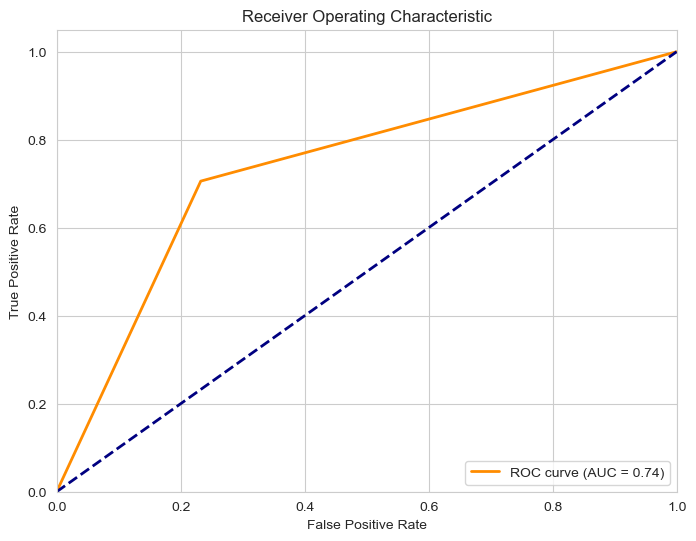

In [46]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_with_early_stop)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Resampling Techniques

In [70]:
# i am having a bad results for class 1 bcz i have imbalanced data so i am trying to see if smote will fix the problem

from imblearn.over_sampling import SMOTE

# making class 1 = 5000
class1_count = 5000
sampling_strategy = {1: class1_count}

smote = SMOTE(sampling_strategy=sampling_strategy, random_state=seed)

# Apply SMOTE to oversample class 1
X_resampled, y_resampled = smote.fit_resample(X, y)

In [71]:
y_resampled.value_counts()

Exited
0    7963
1    5000
Name: count, dtype: int64

In [72]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [73]:
# Create the model with dropout
model_smote = Sequential()

# Add layers to the model
model_smote.add(Dense(16, activation="relu", input_dim=X_resampled.shape[1]))
model_smote.add(Dropout(0.5))
model_smote.add(Dense(32, activation="relu"))
model_smote.add(Dropout(0.5))
model_smote.add(Dense(16, activation="relu"))
model_smote.add(Dropout(0.5))
model_smote.add(Dense(1, activation="sigmoid"))

# Compile the model
model_smote.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping with monitoring of validation loss
early_stop = EarlyStopping(monitor='val_loss', patience=50, verbose=1)

# Train the model with class weights and early stopping
history_smote = model_smote.fit(X_resampled, y_resampled, epochs=1000, batch_size=64, validation_split=0.15, callbacks=[early_stop])

Epoch 1/1000
173/173 [==============================] - 1s 3ms/step - loss: 1725.1025 - accuracy: 0.6314 - val_loss: 2.5939 - val_accuracy: 0.0000e+00
Epoch 2/1000
173/173 [==============================] - 0s 2ms/step - loss: 18.2118 - accuracy: 0.6891 - val_loss: 1.4788 - val_accuracy: 0.0000e+00
Epoch 3/1000
173/173 [==============================] - 0s 2ms/step - loss: 5.5581 - accuracy: 0.7031 - val_loss: 1.3251 - val_accuracy: 0.0000e+00
Epoch 4/1000
173/173 [==============================] - 1s 3ms/step - loss: 2.3116 - accuracy: 0.7080 - val_loss: 1.2602 - val_accuracy: 0.0000e+00
Epoch 5/1000
173/173 [==============================] - 1s 3ms/step - loss: 1.5871 - accuracy: 0.7125 - val_loss: 1.2772 - val_accuracy: 0.0000e+00
Epoch 6/1000
173/173 [==============================] - 0s 3ms/step - loss: 1.0192 - accuracy: 0.7158 - val_loss: 1.2975 - val_accuracy: 0.0000e+00
Epoch 7/1000
173/173 [==============================] - 1s 3ms/step - loss: 0.7883 - accuracy: 0.7163 - val_

173/173 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.7227 - val_loss: 1.2917 - val_accuracy: 0.0000e+00
Epoch 57/1000
173/173 [==============================] - 0s 3ms/step - loss: 0.5905 - accuracy: 0.7227 - val_loss: 1.3172 - val_accuracy: 0.0000e+00
Epoch 58/1000
173/173 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.7227 - val_loss: 1.2603 - val_accuracy: 0.0000e+00
Epoch 59/1000
173/173 [==============================] - 0s 3ms/step - loss: 0.5905 - accuracy: 0.7227 - val_loss: 1.3033 - val_accuracy: 0.0000e+00
Epoch 60/1000
173/173 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.7227 - val_loss: 1.3308 - val_accuracy: 0.0000e+00
Epoch 61/1000
173/173 [==============================] - 0s 2ms/step - loss: 0.5906 - accuracy: 0.7227 - val_loss: 1.2758 - val_accuracy: 0.0000e+00
Epoch 62/1000
173/173 [==============================] - 0s 3ms/step - loss: 0.5907 - accuracy: 0.7227 - val_loss: 1.265

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

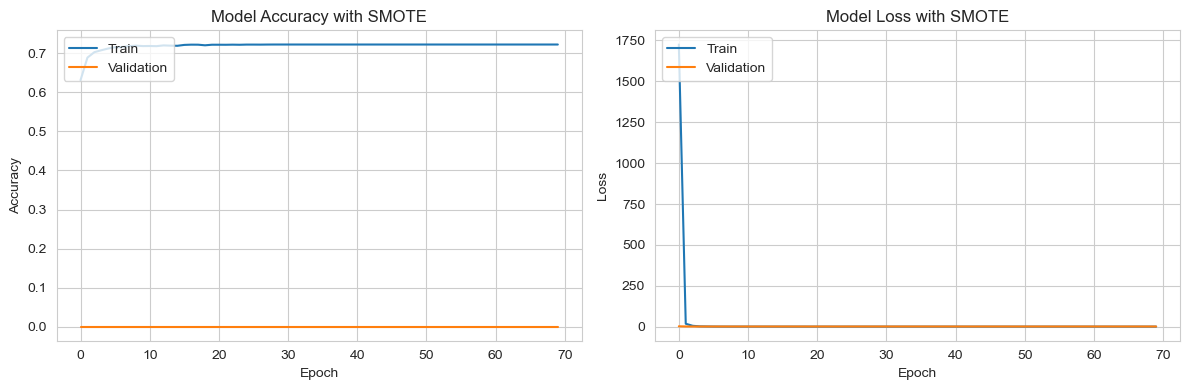

In [74]:
# Plot training history for the model with dropout and early stopping
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_smote.history['accuracy'])
plt.plot(history_smote.history['val_accuracy'])
plt.title('Model Accuracy with SMOTE')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_smote.history['loss'])
plt.plot(history_smote.history['val_loss'])
plt.title('Model Loss with SMOTE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [75]:
# Predict using the test data
y_pred_with_smote = (model_smote.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy_with_smote = accuracy_score(y_test, y_pred_with_smote)

# Calculate confusion matrix
confusion_with_smote = confusion_matrix(y_test, y_pred_with_smote)

# Generate classification report
classification_report_with_smote = classification_report(y_test, y_pred_with_smote)

print("Model Evaluation with SMOTE:")
print(f'Accuracy: {accuracy_with_smote}')
print(f'Confusion Matrix:\n{confusion_with_smote}')
print(f'Classification Report:\n{classification_report_with_smote}')

# didnt work XD

32/32 [==============================] - 0s 2ms/step
Model Evaluation with SMOTE:
Accuracy: 0.796
Confusion Matrix:
[[796   0]
 [204   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       796
           1       0.00      0.00      0.00       204

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.63      0.80      0.71      1000



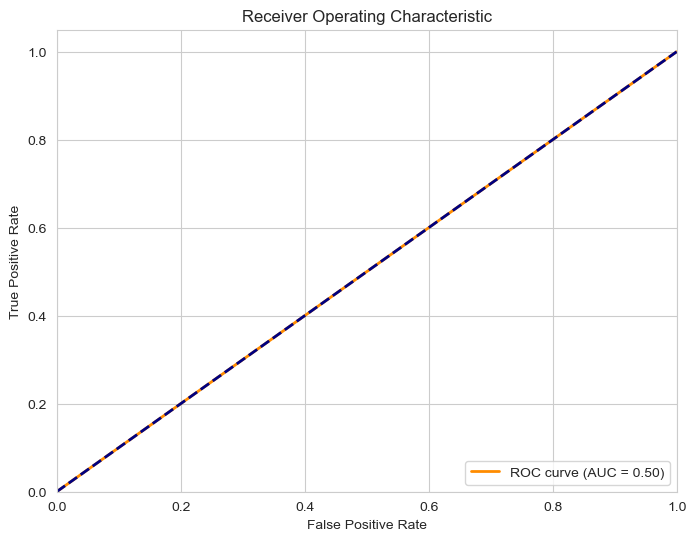

In [76]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_with_smote)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#### Monitor the "val_recall" as metric

In [79]:
from tensorflow.keras.metrics import Metric

# Define a custom metric for validation recall
class ValidationRecall(Metric):
    def __init__(self, name="val_recall", **kwargs):
        super(ValidationRecall, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name="tp", initializer="zeros")
        self.false_negatives = self.add_weight(name="fn", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.convert_to_tensor(y_pred)
        y_true = tf.cast(y_true, y_pred.dtype)

        true_positives = tf.reduce_sum(tf.cast(y_true * y_pred > 0.5, tf.float32))
        false_negatives = tf.reduce_sum(tf.cast(y_true * (1 - y_pred) > 0.5, tf.float32))

        self.true_positives.assign_add(true_positives)
        self.false_negatives.assign_add(false_negatives)

    def result(self):
        recall = self.true_positives / (self.true_positives + self.false_negatives)
        return recall

In [80]:
# Create the model
model_with_val_recall = Sequential()

# Add layers to the model
model_with_val_recall.add(Dense(16, activation="relu", input_dim=X_train.shape[1]))
model_with_val_recall.add(Dropout(0.5))
model_with_val_recall.add(Dense(32, activation="relu"))
model_with_val_recall.add(Dropout(0.5))
model_with_val_recall.add(Dense(16, activation="relu"))
model_with_val_recall.add(Dropout(0.5))
model_with_val_recall.add(Dense(1, activation="sigmoid"))

# Compile the model with the desired optimizer and loss function
model_with_val_recall.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', ValidationRecall()])

# Define early stopping based on val_recall
early_stopping_val_recall = EarlyStopping(monitor='val_recall', patience=50, restore_best_weights=True)

In [81]:
# Train the model with class weights, validation split, and early stopping based on val_recall
history_with_val_recall = model_with_val_recall.fit(
    X_train,
    y_train,
    validation_split=0.15,
    epochs=1000,
    batch_size=64,
    class_weight={0: class_weights[0], 1: class_weights[1]},
    callbacks=[early_stopping_val_recall]
)

Epoch 1/1000
120/120 [==============================] - 3s 11ms/step - loss: 0.7148 - accuracy: 0.4793 - val_recall: 0.5538 - val_loss: 0.6723 - val_accuracy: 0.7556 - val_val_recall: 0.2071
Epoch 2/1000
120/120 [==============================] - 1s 7ms/step - loss: 0.6957 - accuracy: 0.5455 - val_recall: 0.4643 - val_loss: 0.6764 - val_accuracy: 0.7489 - val_val_recall: 0.2893
Epoch 3/1000
120/120 [==============================] - 1s 7ms/step - loss: 0.6908 - accuracy: 0.5631 - val_recall: 0.4501 - val_loss: 0.6759 - val_accuracy: 0.7207 - val_val_recall: 0.3821
Epoch 4/1000
120/120 [==============================] - 1s 6ms/step - loss: 0.6876 - accuracy: 0.5792 - val_recall: 0.4559 - val_loss: 0.6676 - val_accuracy: 0.7000 - val_val_recall: 0.4250
Epoch 5/1000
120/120 [==============================] - 1s 6ms/step - loss: 0.6820 - accuracy: 0.6146 - val_recall: 0.4675 - val_loss: 0.6748 - val_accuracy: 0.6489 - val_val_recall: 0.6107
Epoch 6/1000
120/120 [===========================

Epoch 44/1000
120/120 [==============================] - 1s 7ms/step - loss: 0.5752 - accuracy: 0.7350 - val_recall: 0.6343 - val_loss: 0.5182 - val_accuracy: 0.7496 - val_val_recall: 0.7500
Epoch 45/1000
120/120 [==============================] - 1s 7ms/step - loss: 0.5776 - accuracy: 0.7379 - val_recall: 0.6413 - val_loss: 0.5350 - val_accuracy: 0.7370 - val_val_recall: 0.7893
Epoch 46/1000
120/120 [==============================] - 1s 7ms/step - loss: 0.5689 - accuracy: 0.7473 - val_recall: 0.6504 - val_loss: 0.5111 - val_accuracy: 0.7511 - val_val_recall: 0.7607
Epoch 47/1000
120/120 [==============================] - 1s 6ms/step - loss: 0.5649 - accuracy: 0.7476 - val_recall: 0.6549 - val_loss: 0.5200 - val_accuracy: 0.7615 - val_val_recall: 0.7571
Epoch 48/1000
120/120 [==============================] - 1s 6ms/step - loss: 0.5602 - accuracy: 0.7392 - val_recall: 0.6478 - val_loss: 0.5194 - val_accuracy: 0.7319 - val_val_recall: 0.8036
Epoch 49/1000
120/120 [======================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

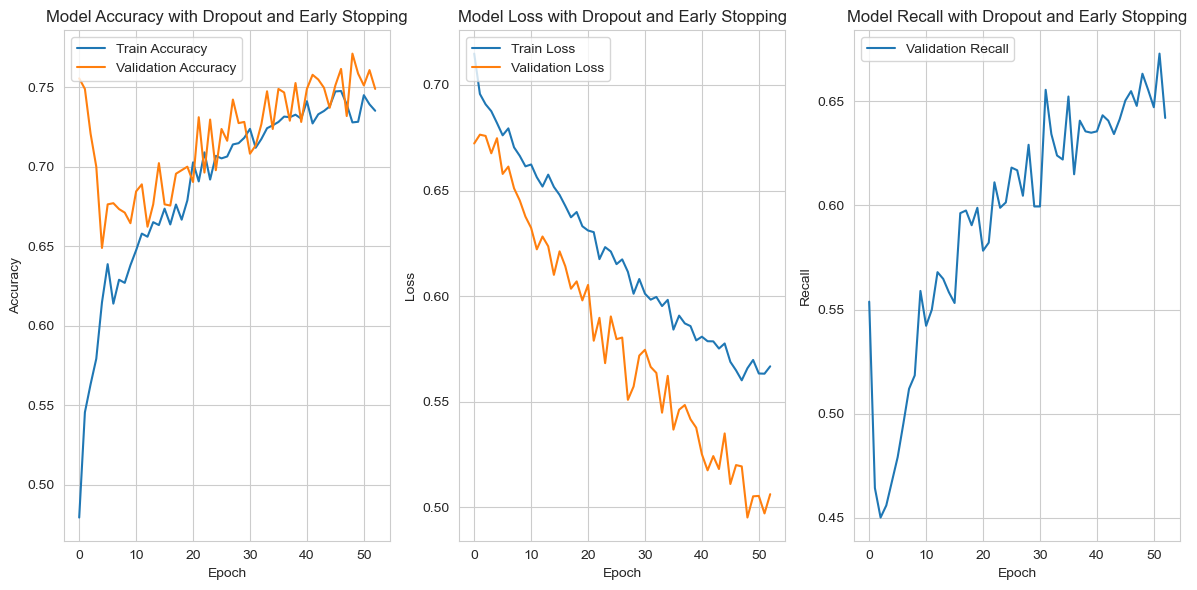

In [82]:
# Plot training history for the model with dropout, early stopping, and recall
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 3, 1)
plt.plot(history_with_val_recall.history['accuracy'], label='Train Accuracy')
plt.plot(history_with_val_recall.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Dropout and Early Stopping')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 3, 2)
plt.plot(history_with_val_recall.history['loss'], label='Train Loss')
plt.plot(history_with_val_recall.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Dropout and Early Stopping')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation recall values
plt.subplot(1, 3, 3)
plt.plot(history_with_val_recall.history['val_recall'], label='Validation Recall')
plt.title('Model Recall with Dropout and Early Stopping')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [83]:
# Predict using the test data
y_pred_with_val_recall = (model_with_val_recall.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy_with_recall = accuracy_score(y_test, y_pred_with_val_recall)

# Calculate confusion matrix
confusion_with_recall = confusion_matrix(y_test, y_pred_with_val_recall)

# Generate classification report
classification_report_with_recall = classification_report(y_test, y_pred_with_val_recall)

print("Model Evaluation with Recall:")
print(f'Accuracy: {accuracy_with_recall}')
print(f'Confusion Matrix:\n{confusion_with_recall}')
print(f'Classification Report:\n{classification_report_with_recall}')

32/32 [==============================] - 0s 3ms/step
Model Evaluation with Recall:
Accuracy: 0.716
Confusion Matrix:
[[642 154]
 [130  74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       796
           1       0.32      0.36      0.34       204

    accuracy                           0.72      1000
   macro avg       0.58      0.58      0.58      1000
weighted avg       0.73      0.72      0.72      1000



## Optuna

In [94]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [123]:
from sklearn.metrics import recall_score

def create_model(num_hidden_layers, num_neurons, dropout_rate):
    model = Sequential()
    model.add(Dense(num_neurons, activation='relu', input_dim=X_train.shape[1]))
    
    for _ in range(num_hidden_layers):
        model.add(Dense(num_neurons, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    return model

# Define the objective function for Optuna
def objective(trial):
    # Sample hyperparameters
    num_hidden_layers = trial.suggest_int("num_hidden_layers", 1, 5)
    num_neurons = trial.suggest_int("num_neurons", 32, 256)
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)

    # Create the model
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=X_train.shape[1], activation="relu"))

    for _ in range(num_hidden_layers):
        model.add(Dense(num_neurons, activation="relu"))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation="sigmoid"))

    # Compile the model
    model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

    # Add early stopping
    early_stopping = EarlyStopping(monitor="val_loss", patience=10, verbose=0, mode="auto", restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, validation_split=0.15, epochs=100, batch_size=64, callbacks=[early_stopping], verbose=0)

    # Evaluate the model on the test set
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    recall = recall_score(y_test, y_pred)

    return recall

In [124]:
# Create an Optuna study for maximizing recall
study = optuna.create_study(direction="maximize")

# Run the optimization trials
study.optimize(objective, n_trials=100)

# Get the best parameters
best_params = study.best_params
best_recall = study.best_value

# Train the final model using the best parameters
model_optuna = create_model(best_params["num_hidden_layers"], best_params["num_neurons"], best_params["dropout_rate"])
model_optuna.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model_optuna.fit(X_train, y_train, validation_split=0.15, epochs=50, batch_size=64)

# Evaluate the final model on your test set and compute recall
y_pred_test = (model_optuna.predict(X_test) > 0.5).astype(int)
test_recall = recall_score(y_test, y_pred_test)

print(f"Best Recall: {best_recall}")
print(f"Test Recall: {test_recall}")
print("Best Hyperparameters:", best_params)

[I 2023-10-30 21:00:29,667] A new study created in memory with name: no-name-8b1d1eef-36e9-4b75-8256-913a3d117ee1


32/32 [==============================] - 0s 4ms/step


[I 2023-10-30 21:01:16,127] Trial 0 finished with value: 0.4019607843137255 and parameters: {'num_hidden_layers': 3, 'num_neurons': 165, 'dropout_rate': 0.2739616975955256}. Best is trial 0 with value: 0.4019607843137255.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:01:58,199] Trial 1 finished with value: 0.3627450980392157 and parameters: {'num_hidden_layers': 2, 'num_neurons': 97, 'dropout_rate': 0.21877840516038344}. Best is trial 0 with value: 0.4019607843137255.


32/32 [==============================] - 0s 4ms/step


[I 2023-10-30 21:02:37,429] Trial 2 finished with value: 0.35294117647058826 and parameters: {'num_hidden_layers': 2, 'num_neurons': 233, 'dropout_rate': 0.10386157657706052}. Best is trial 0 with value: 0.4019607843137255.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 21:03:10,446] Trial 3 finished with value: 0.35784313725490197 and parameters: {'num_hidden_layers': 2, 'num_neurons': 118, 'dropout_rate': 0.12868150638525191}. Best is trial 0 with value: 0.4019607843137255.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 21:03:50,948] Trial 4 finished with value: 0.4019607843137255 and parameters: {'num_hidden_layers': 3, 'num_neurons': 179, 'dropout_rate': 0.45430911635551974}. Best is trial 0 with value: 0.4019607843137255.


32/32 [==============================] - 0s 4ms/step


[I 2023-10-30 21:04:47,201] Trial 5 finished with value: 0.3627450980392157 and parameters: {'num_hidden_layers': 5, 'num_neurons': 256, 'dropout_rate': 0.25124560670335105}. Best is trial 0 with value: 0.4019607843137255.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 21:05:35,175] Trial 6 finished with value: 0.3480392156862745 and parameters: {'num_hidden_layers': 3, 'num_neurons': 238, 'dropout_rate': 0.1124135042749551}. Best is trial 0 with value: 0.4019607843137255.


32/32 [==============================] - 0s 4ms/step


[I 2023-10-30 21:06:09,755] Trial 7 finished with value: 0.3872549019607843 and parameters: {'num_hidden_layers': 3, 'num_neurons': 220, 'dropout_rate': 0.1730867037845381}. Best is trial 0 with value: 0.4019607843137255.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 21:06:39,086] Trial 8 finished with value: 0.36764705882352944 and parameters: {'num_hidden_layers': 4, 'num_neurons': 48, 'dropout_rate': 0.10130967326262025}. Best is trial 0 with value: 0.4019607843137255.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 21:07:24,037] Trial 9 finished with value: 0.43137254901960786 and parameters: {'num_hidden_layers': 1, 'num_neurons': 69, 'dropout_rate': 0.10397911332429324}. Best is trial 9 with value: 0.43137254901960786.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 21:08:04,599] Trial 10 finished with value: 0.39705882352941174 and parameters: {'num_hidden_layers': 1, 'num_neurons': 38, 'dropout_rate': 0.3474619564552611}. Best is trial 9 with value: 0.43137254901960786.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:08:54,808] Trial 11 finished with value: 0.38235294117647056 and parameters: {'num_hidden_layers': 1, 'num_neurons': 165, 'dropout_rate': 0.29459434358583647}. Best is trial 9 with value: 0.43137254901960786.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:09:35,845] Trial 12 finished with value: 0.3284313725490196 and parameters: {'num_hidden_layers': 5, 'num_neurons': 84, 'dropout_rate': 0.2081561562705846}. Best is trial 9 with value: 0.43137254901960786.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:10:13,967] Trial 13 finished with value: 0.36764705882352944 and parameters: {'num_hidden_layers': 4, 'num_neurons': 130, 'dropout_rate': 0.3446436561468706}. Best is trial 9 with value: 0.43137254901960786.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:10:56,022] Trial 14 finished with value: 0.38235294117647056 and parameters: {'num_hidden_layers': 1, 'num_neurons': 191, 'dropout_rate': 0.16498114001221517}. Best is trial 9 with value: 0.43137254901960786.


32/32 [==============================] - 0s 4ms/step


[I 2023-10-30 21:11:36,851] Trial 15 finished with value: 0.3382352941176471 and parameters: {'num_hidden_layers': 4, 'num_neurons': 155, 'dropout_rate': 0.2530632269540908}. Best is trial 9 with value: 0.43137254901960786.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:12:11,809] Trial 16 finished with value: 0.35294117647058826 and parameters: {'num_hidden_layers': 2, 'num_neurons': 70, 'dropout_rate': 0.16053964001489857}. Best is trial 9 with value: 0.43137254901960786.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:12:48,316] Trial 17 finished with value: 0.39705882352941174 and parameters: {'num_hidden_layers': 1, 'num_neurons': 112, 'dropout_rate': 0.3946837262098463}. Best is trial 9 with value: 0.43137254901960786.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 21:13:27,934] Trial 18 finished with value: 0.37254901960784315 and parameters: {'num_hidden_layers': 4, 'num_neurons': 202, 'dropout_rate': 0.27867206617621443}. Best is trial 9 with value: 0.43137254901960786.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:14:04,559] Trial 19 finished with value: 0.4068627450980392 and parameters: {'num_hidden_layers': 2, 'num_neurons': 138, 'dropout_rate': 0.22125843291941658}. Best is trial 9 with value: 0.43137254901960786.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:14:39,294] Trial 20 finished with value: 0.3872549019607843 and parameters: {'num_hidden_layers': 2, 'num_neurons': 65, 'dropout_rate': 0.20801418198393884}. Best is trial 9 with value: 0.43137254901960786.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 21:15:17,081] Trial 21 finished with value: 0.39705882352941174 and parameters: {'num_hidden_layers': 2, 'num_neurons': 145, 'dropout_rate': 0.24691611538564082}. Best is trial 9 with value: 0.43137254901960786.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:15:52,571] Trial 22 finished with value: 0.4019607843137255 and parameters: {'num_hidden_layers': 3, 'num_neurons': 133, 'dropout_rate': 0.14556155379003152}. Best is trial 9 with value: 0.43137254901960786.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:16:28,885] Trial 23 finished with value: 0.38235294117647056 and parameters: {'num_hidden_layers': 1, 'num_neurons': 170, 'dropout_rate': 0.20881438963241605}. Best is trial 9 with value: 0.43137254901960786.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:17:00,779] Trial 24 finished with value: 0.38235294117647056 and parameters: {'num_hidden_layers': 3, 'num_neurons': 97, 'dropout_rate': 0.17850459373958444}. Best is trial 9 with value: 0.43137254901960786.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 21:17:32,727] Trial 25 finished with value: 0.3627450980392157 and parameters: {'num_hidden_layers': 2, 'num_neurons': 200, 'dropout_rate': 0.14095990238478295}. Best is trial 9 with value: 0.43137254901960786.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:18:13,091] Trial 26 finished with value: 0.4411764705882353 and parameters: {'num_hidden_layers': 1, 'num_neurons': 150, 'dropout_rate': 0.3177829584341466}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:18:53,774] Trial 27 finished with value: 0.3872549019607843 and parameters: {'num_hidden_layers': 1, 'num_neurons': 140, 'dropout_rate': 0.3285882255587914}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:19:33,810] Trial 28 finished with value: 0.39215686274509803 and parameters: {'num_hidden_layers': 1, 'num_neurons': 114, 'dropout_rate': 0.13534748636746846}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:20:08,329] Trial 29 finished with value: 0.39215686274509803 and parameters: {'num_hidden_layers': 1, 'num_neurons': 154, 'dropout_rate': 0.29215665468123597}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:20:41,427] Trial 30 finished with value: 0.37745098039215685 and parameters: {'num_hidden_layers': 2, 'num_neurons': 68, 'dropout_rate': 0.3156183871275652}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 21:21:17,829] Trial 31 finished with value: 0.4068627450980392 and parameters: {'num_hidden_layers': 2, 'num_neurons': 175, 'dropout_rate': 0.2287825782089471}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:21:46,382] Trial 32 finished with value: 0.31862745098039214 and parameters: {'num_hidden_layers': 2, 'num_neurons': 184, 'dropout_rate': 0.2342308167253189}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:22:23,426] Trial 33 finished with value: 0.38235294117647056 and parameters: {'num_hidden_layers': 1, 'num_neurons': 212, 'dropout_rate': 0.18962785998773496}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 21:22:52,423] Trial 34 finished with value: 0.3872549019607843 and parameters: {'num_hidden_layers': 2, 'num_neurons': 94, 'dropout_rate': 0.26731303828283975}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:23:30,561] Trial 35 finished with value: 0.37254901960784315 and parameters: {'num_hidden_layers': 2, 'num_neurons': 170, 'dropout_rate': 0.23780400754256567}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 4ms/step


[I 2023-10-30 21:24:13,865] Trial 36 finished with value: 0.37254901960784315 and parameters: {'num_hidden_layers': 1, 'num_neurons': 124, 'dropout_rate': 0.22157511931448695}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:24:39,606] Trial 37 finished with value: 0.3872549019607843 and parameters: {'num_hidden_layers': 2, 'num_neurons': 149, 'dropout_rate': 0.12020938990173438}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 21:25:17,290] Trial 38 finished with value: 0.4068627450980392 and parameters: {'num_hidden_layers': 1, 'num_neurons': 105, 'dropout_rate': 0.196921148579645}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:25:42,986] Trial 39 finished with value: 0.3627450980392157 and parameters: {'num_hidden_layers': 3, 'num_neurons': 84, 'dropout_rate': 0.15342049139296463}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 21:26:10,739] Trial 40 finished with value: 0.3872549019607843 and parameters: {'num_hidden_layers': 2, 'num_neurons': 232, 'dropout_rate': 0.1030853128553742}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:27:08,886] Trial 41 finished with value: 0.3872549019607843 and parameters: {'num_hidden_layers': 1, 'num_neurons': 53, 'dropout_rate': 0.19214622845635743}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 4ms/step


[I 2023-10-30 21:27:45,724] Trial 42 finished with value: 0.37254901960784315 and parameters: {'num_hidden_layers': 1, 'num_neurons': 109, 'dropout_rate': 0.18916907713456363}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:28:15,822] Trial 43 finished with value: 0.4068627450980392 and parameters: {'num_hidden_layers': 1, 'num_neurons': 100, 'dropout_rate': 0.11939136440028743}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 4ms/step


[I 2023-10-30 21:28:49,837] Trial 44 finished with value: 0.4166666666666667 and parameters: {'num_hidden_layers': 1, 'num_neurons': 135, 'dropout_rate': 0.26711533736813386}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:29:45,640] Trial 45 finished with value: 0.4166666666666667 and parameters: {'num_hidden_layers': 1, 'num_neurons': 162, 'dropout_rate': 0.26216071851220973}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:30:27,069] Trial 46 finished with value: 0.4019607843137255 and parameters: {'num_hidden_layers': 1, 'num_neurons': 160, 'dropout_rate': 0.27516615700174046}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:31:05,274] Trial 47 finished with value: 0.35294117647058826 and parameters: {'num_hidden_layers': 1, 'num_neurons': 136, 'dropout_rate': 0.2571659175241758}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:31:47,132] Trial 48 finished with value: 0.4019607843137255 and parameters: {'num_hidden_layers': 1, 'num_neurons': 183, 'dropout_rate': 0.25418248947344474}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:32:33,965] Trial 49 finished with value: 0.4019607843137255 and parameters: {'num_hidden_layers': 1, 'num_neurons': 124, 'dropout_rate': 0.29648580778270633}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 21:33:16,496] Trial 50 finished with value: 0.3480392156862745 and parameters: {'num_hidden_layers': 1, 'num_neurons': 146, 'dropout_rate': 0.3117520545968909}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 21:33:48,550] Trial 51 finished with value: 0.35294117647058826 and parameters: {'num_hidden_layers': 2, 'num_neurons': 170, 'dropout_rate': 0.23109796351898038}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:34:20,730] Trial 52 finished with value: 0.3333333333333333 and parameters: {'num_hidden_layers': 2, 'num_neurons': 177, 'dropout_rate': 0.22150514766615914}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:34:49,245] Trial 53 finished with value: 0.39215686274509803 and parameters: {'num_hidden_layers': 3, 'num_neurons': 192, 'dropout_rate': 0.16916606183485514}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:35:37,361] Trial 54 finished with value: 0.4019607843137255 and parameters: {'num_hidden_layers': 1, 'num_neurons': 156, 'dropout_rate': 0.27576649837545864}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:36:31,960] Trial 55 finished with value: 0.4019607843137255 and parameters: {'num_hidden_layers': 5, 'num_neurons': 162, 'dropout_rate': 0.23866921098688254}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 21:37:13,463] Trial 56 finished with value: 0.3480392156862745 and parameters: {'num_hidden_layers': 1, 'num_neurons': 125, 'dropout_rate': 0.2877813375925072}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:37:48,161] Trial 57 finished with value: 0.36764705882352944 and parameters: {'num_hidden_layers': 2, 'num_neurons': 142, 'dropout_rate': 0.26818902054449245}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:38:53,781] Trial 58 finished with value: 0.38235294117647056 and parameters: {'num_hidden_layers': 1, 'num_neurons': 32, 'dropout_rate': 0.2116105190559129}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 4ms/step


[I 2023-10-30 21:39:30,334] Trial 59 finished with value: 0.4411764705882353 and parameters: {'num_hidden_layers': 3, 'num_neurons': 88, 'dropout_rate': 0.26005794641556995}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:40:13,676] Trial 60 finished with value: 0.4215686274509804 and parameters: {'num_hidden_layers': 3, 'num_neurons': 85, 'dropout_rate': 0.2623050335771597}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 21:40:42,939] Trial 61 finished with value: 0.3480392156862745 and parameters: {'num_hidden_layers': 3, 'num_neurons': 85, 'dropout_rate': 0.2635679096131837}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 4ms/step


[I 2023-10-30 21:41:24,378] Trial 62 finished with value: 0.37745098039215685 and parameters: {'num_hidden_layers': 3, 'num_neurons': 56, 'dropout_rate': 0.30915043711914814}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:41:55,403] Trial 63 finished with value: 0.35784313725490197 and parameters: {'num_hidden_layers': 4, 'num_neurons': 75, 'dropout_rate': 0.24646961774492462}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:42:40,940] Trial 64 finished with value: 0.4117647058823529 and parameters: {'num_hidden_layers': 4, 'num_neurons': 76, 'dropout_rate': 0.2525425014011249}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:43:18,328] Trial 65 finished with value: 0.3333333333333333 and parameters: {'num_hidden_layers': 4, 'num_neurons': 44, 'dropout_rate': 0.28478226261929473}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:43:47,894] Trial 66 finished with value: 0.3627450980392157 and parameters: {'num_hidden_layers': 4, 'num_neurons': 76, 'dropout_rate': 0.34132409707629513}. Best is trial 26 with value: 0.4411764705882353.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:44:37,502] Trial 67 finished with value: 0.44607843137254904 and parameters: {'num_hidden_layers': 5, 'num_neurons': 89, 'dropout_rate': 0.24883217049521464}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:45:17,409] Trial 68 finished with value: 0.3627450980392157 and parameters: {'num_hidden_layers': 5, 'num_neurons': 90, 'dropout_rate': 0.2810297350081811}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 21:45:48,846] Trial 69 finished with value: 0.3480392156862745 and parameters: {'num_hidden_layers': 3, 'num_neurons': 62, 'dropout_rate': 0.30488856260999886}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:46:37,941] Trial 70 finished with value: 0.35784313725490197 and parameters: {'num_hidden_layers': 5, 'num_neurons': 118, 'dropout_rate': 0.3242972100185729}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 21:47:11,734] Trial 71 finished with value: 0.35784313725490197 and parameters: {'num_hidden_layers': 5, 'num_neurons': 79, 'dropout_rate': 0.2616769172535248}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:47:40,239] Trial 72 finished with value: 0.37254901960784315 and parameters: {'num_hidden_layers': 4, 'num_neurons': 102, 'dropout_rate': 0.2975285797676058}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:48:19,895] Trial 73 finished with value: 0.36764705882352944 and parameters: {'num_hidden_layers': 5, 'num_neurons': 91, 'dropout_rate': 0.24827725104341644}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:48:56,706] Trial 74 finished with value: 0.4411764705882353 and parameters: {'num_hidden_layers': 3, 'num_neurons': 61, 'dropout_rate': 0.2688681502548627}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:49:27,988] Trial 75 finished with value: 0.3872549019607843 and parameters: {'num_hidden_layers': 3, 'num_neurons': 60, 'dropout_rate': 0.2730419150622084}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 21:50:05,841] Trial 76 finished with value: 0.39215686274509803 and parameters: {'num_hidden_layers': 3, 'num_neurons': 46, 'dropout_rate': 0.28295217795176086}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 21:50:40,032] Trial 77 finished with value: 0.4411764705882353 and parameters: {'num_hidden_layers': 3, 'num_neurons': 71, 'dropout_rate': 0.29390925447352595}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:51:12,723] Trial 78 finished with value: 0.39215686274509803 and parameters: {'num_hidden_layers': 3, 'num_neurons': 72, 'dropout_rate': 0.2962134495448825}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 4ms/step


[I 2023-10-30 21:51:48,339] Trial 79 finished with value: 0.37254901960784315 and parameters: {'num_hidden_layers': 3, 'num_neurons': 55, 'dropout_rate': 0.3623051524059163}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:52:15,971] Trial 80 finished with value: 0.3872549019607843 and parameters: {'num_hidden_layers': 3, 'num_neurons': 81, 'dropout_rate': 0.12997922482458235}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:52:45,607] Trial 81 finished with value: 0.39215686274509803 and parameters: {'num_hidden_layers': 3, 'num_neurons': 66, 'dropout_rate': 0.26306558972731575}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:53:14,495] Trial 82 finished with value: 0.37745098039215685 and parameters: {'num_hidden_layers': 3, 'num_neurons': 85, 'dropout_rate': 0.2405771714313185}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:54:03,093] Trial 83 finished with value: 0.4019607843137255 and parameters: {'num_hidden_layers': 3, 'num_neurons': 50, 'dropout_rate': 0.2865160898728276}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 21:54:46,363] Trial 84 finished with value: 0.36764705882352944 and parameters: {'num_hidden_layers': 3, 'num_neurons': 70, 'dropout_rate': 0.2722472103617355}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:55:28,774] Trial 85 finished with value: 0.4117647058823529 and parameters: {'num_hidden_layers': 1, 'num_neurons': 108, 'dropout_rate': 0.22424496842419603}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:56:08,933] Trial 86 finished with value: 0.4117647058823529 and parameters: {'num_hidden_layers': 4, 'num_neurons': 40, 'dropout_rate': 0.30378792266082205}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:56:43,651] Trial 87 finished with value: 0.37254901960784315 and parameters: {'num_hidden_layers': 3, 'num_neurons': 97, 'dropout_rate': 0.2308320656254697}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 21:57:22,914] Trial 88 finished with value: 0.4068627450980392 and parameters: {'num_hidden_layers': 1, 'num_neurons': 151, 'dropout_rate': 0.14904252511922703}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 4ms/step


[I 2023-10-30 21:58:00,205] Trial 89 finished with value: 0.39705882352941174 and parameters: {'num_hidden_layers': 1, 'num_neurons': 67, 'dropout_rate': 0.25666190009970125}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 21:58:32,906] Trial 90 finished with value: 0.37254901960784315 and parameters: {'num_hidden_layers': 3, 'num_neurons': 95, 'dropout_rate': 0.2423869820855776}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 21:59:06,539] Trial 91 finished with value: 0.36764705882352944 and parameters: {'num_hidden_layers': 4, 'num_neurons': 60, 'dropout_rate': 0.25056156955135545}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 21:59:45,132] Trial 92 finished with value: 0.36764705882352944 and parameters: {'num_hidden_layers': 4, 'num_neurons': 74, 'dropout_rate': 0.25556722922793274}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 5ms/step


[I 2023-10-30 22:00:23,980] Trial 93 finished with value: 0.4117647058823529 and parameters: {'num_hidden_layers': 5, 'num_neurons': 89, 'dropout_rate': 0.2671658826530851}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 22:00:56,782] Trial 94 finished with value: 0.3627450980392157 and parameters: {'num_hidden_layers': 4, 'num_neurons': 80, 'dropout_rate': 0.2889329090402002}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 22:01:29,592] Trial 95 finished with value: 0.3480392156862745 and parameters: {'num_hidden_layers': 3, 'num_neurons': 167, 'dropout_rate': 0.2786360886362032}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 22:02:07,840] Trial 96 finished with value: 0.36764705882352944 and parameters: {'num_hidden_layers': 1, 'num_neurons': 115, 'dropout_rate': 0.23125077767746624}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 22:02:42,557] Trial 97 finished with value: 0.4068627450980392 and parameters: {'num_hidden_layers': 1, 'num_neurons': 134, 'dropout_rate': 0.1002785840921942}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 3ms/step


[I 2023-10-30 22:03:20,706] Trial 98 finished with value: 0.3872549019607843 and parameters: {'num_hidden_layers': 3, 'num_neurons': 255, 'dropout_rate': 0.20344990440409308}. Best is trial 67 with value: 0.44607843137254904.


32/32 [==============================] - 0s 2ms/step


[I 2023-10-30 22:03:58,088] Trial 99 finished with value: 0.37745098039215685 and parameters: {'num_hidden_layers': 1, 'num_neurons': 63, 'dropout_rate': 0.2481633664262282}. Best is trial 67 with value: 0.44607843137254904.


Epoch 1/50
120/120 [==============================] - 4s 9ms/step - loss: 0.4969 - accuracy: 0.7949 - val_loss: 0.4641 - val_accuracy: 0.7926
Epoch 2/50
120/120 [==============================] - 1s 8ms/step - loss: 0.4557 - accuracy: 0.7970 - val_loss: 0.4301 - val_accuracy: 0.7926
Epoch 3/50
120/120 [==============================] - 1s 8ms/step - loss: 0.4371 - accuracy: 0.8056 - val_loss: 0.4074 - val_accuracy: 0.8274
Epoch 4/50
120/120 [==============================] - 1s 8ms/step - loss: 0.4087 - accuracy: 0.8307 - val_loss: 0.3768 - val_accuracy: 0.8474
Epoch 5/50
120/120 [==============================] - 2s 16ms/step - loss: 0.3884 - accuracy: 0.8441 - val_loss: 0.3671 - val_accuracy: 0.8467
Epoch 6/50
120/120 [==============================] - 2s 15ms/step - loss: 0.3753 - accuracy: 0.8490 - val_loss: 0.3569 - val_accuracy: 0.8526
Epoch 7/50
120/120 [==============================] - 2s 15ms/step - loss: 0.3694 - accuracy: 0.8540 - val_loss: 0.3399 - val_accuracy: 0.8615
Epo

In [125]:
# Obtain the best hyperparameters from Optuna study
best_params = study.best_params

# Define and compile the model using the best hyperparameters
model_with_optuna = Sequential()
model_with_optuna.add(Dense(best_params['num_neurons'], activation="relu", input_dim=X_train.shape[1]))

for _ in range(best_params['num_hidden_layers']):
    model_with_optuna.add(Dense(best_params['num_neurons'], activation="relu"))
    model_with_optuna.add(Dropout(best_params['dropout_rate']))

model_with_optuna.add(Dense(1, activation="sigmoid"))

model_with_optuna.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history_with_optuna = model_with_optuna.fit(X_train, y_train, validation_split=0.15, epochs=1000, batch_size=64, callbacks=[early_stopping])

Epoch 1/1000
120/120 [==============================] - 4s 11ms/step - loss: 0.5057 - accuracy: 0.7939 - val_loss: 0.4761 - val_accuracy: 0.7926
Epoch 2/1000
120/120 [==============================] - 1s 9ms/step - loss: 0.4684 - accuracy: 0.7970 - val_loss: 0.4444 - val_accuracy: 0.7926
Epoch 3/1000
120/120 [==============================] - 1s 9ms/step - loss: 0.4437 - accuracy: 0.7986 - val_loss: 0.4533 - val_accuracy: 0.7956
Epoch 4/1000
120/120 [==============================] - 1s 9ms/step - loss: 0.4303 - accuracy: 0.8149 - val_loss: 0.3971 - val_accuracy: 0.8393
Epoch 5/1000
120/120 [==============================] - 1s 9ms/step - loss: 0.4009 - accuracy: 0.8369 - val_loss: 0.3846 - val_accuracy: 0.8356
Epoch 6/1000
120/120 [==============================] - 1s 9ms/step - loss: 0.3802 - accuracy: 0.8472 - val_loss: 0.3538 - val_accuracy: 0.8563
Epoch 7/1000
120/120 [==============================] - 2s 16ms/step - loss: 0.3707 - accuracy: 0.8539 - val_loss: 0.3511 - val_accurac

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

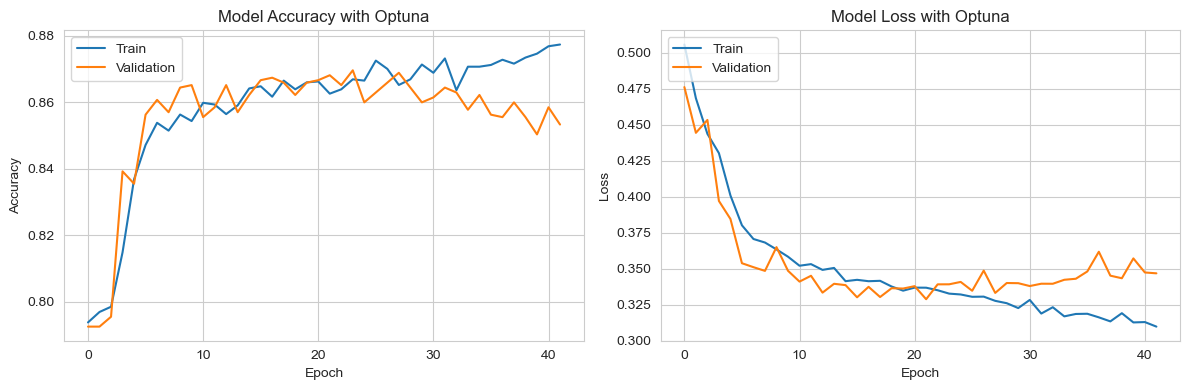

In [126]:
# Plot training history for the model with dropout and early stopping
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_with_optuna.history['accuracy'])
plt.plot(history_with_optuna.history['val_accuracy'])
plt.title('Model Accuracy with Optuna')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_with_optuna.history['loss'])
plt.plot(history_with_optuna.history['val_loss'])
plt.title('Model Loss with Optuna')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [127]:
# Predict using the test data
y_predoptuna = (model_with_optuna.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracyoptuna = accuracy_score(y_test, y_predoptuna)

# Calculate confusion matrix
confusionoptuna = confusion_matrix(y_test, y_predoptuna)

# Generate classification report
classification_reportoptuna = classification_report(y_test, y_predoptuna)

print("Model Evaluation with Optuna:")
print(f'Accuracy: {accuracyoptuna}')
print(f'Confusion Matrix:\n{confusionoptuna}')
print(f'Classification Report:\n{classification_reportoptuna}')

32/32 [==============================] - 0s 3ms/step
Model Evaluation with Optuna:
Accuracy: 0.844
Confusion Matrix:
[[776  20]
 [136  68]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       796
           1       0.77      0.33      0.47       204

    accuracy                           0.84      1000
   macro avg       0.81      0.65      0.69      1000
weighted avg       0.83      0.84      0.82      1000



# Final Model and Model Deployment

In [63]:
import pickle
pickle.dump(scaler, open("scaler_early_stopping", "wb"))

In [50]:
# Save the model to an HDF5 file
model_with_early_stopping.save("model_with_early_stopping.h5")

# couldn't solve the problem so i will predict using this model directly

ImportError: `save_model()` using h5 format requires h5py. Could not import h5py.

In [ ]:
from keras.models import load_model

# Load the saved model
loaded_model = load_model("model_with_early_stopping.h5")

## Prediction

In [62]:
single_value = df.drop("Exited", axis=1).iloc[0:1, :]
single_value

CreditScore  Geography  Gender  Age  Tenure  Balance  NumOfProducts  \
0          619          0       0   42       2    0.000              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1       101348.880

In [75]:
(model_with_early_stopping.predict(single_value) > 0.5).astype("int32")

1/1 [==============================] - 0s 122ms/step


array([[1]])

In [78]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___